# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 15 (Tuesday) 11:00 pm </b> </font>

<h3><font color="blue"> Somesh Ganesh Kale </font></h3>

# I. Introduction

In this Assignment, "Pulsar star" dataset is used for implementing different Classification methods. This dataset contains several features, in these features some are independent features like Mean of the integrated profile, Standard deviation of the integrated profile,Excess kurtosis of the integrated profile, Skewness of the integrated profile, Mean of the DM-SNR curve, Standard deviation of the DM-SNR curve, Excess kurtosis of the DM-SNR curve, Skewness of the DM-SNR curve that are not affected by other features and 1 target class viz. dependent on independent features. Target class consists of 0s and 1s showing 1 if it's a pulsar star and 0 if not. After implementing the dataset, data preprocessing is done on the data like normalizing the dataset i.e fitting the features in the dataset between -1 to 1 range. For classification of the dataset, different methods like Pocket algorithm, Quadratic Discriminant Analysis(QDA), Linear Discriminant Analysis(LDA) and Logistic Regression are implemented. Comparision of these methods are made based on the evaluation metrics like accuracy, F1 score, confusion matrix, recall, precision and specificity. Testing the learned model on the unseen data and seen data will help us understand how our model is performing on unseen data compairing with the seen data whether its underfitting or overfitting.  

# II. Data

### Description

#### Dataset contains 17,898 observations of Pulsar Star. Pulsars are a rare type of Neutron star that produces radio emission. Classisfication treats this dataset as binary classification problem where, 0 represents Non-pulsar i.e negative and 1 represents Pulsar i.e positive. 

Every observation is described by 8 independent features, and 1 target or dependent feature. The first four features are obtained from the integrated pulse profile. The remaining four features are obtained from the DM-SNR curve.

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Target Class

Total Observations : 17,898  
Total Pulsar : 1,639   
Total Non-Pulsar : 16,259  

Source: https://archive.ics.uci.edu/ml/datasets/HTRU2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


#### Reading the Data

In [2]:
df=pd.read_csv("pulsar_stars1.csv")

reading the dataset using pandas "read_csv" function and passing the dataset name

In [3]:
df.head()

,Mean_profile,Standarddeviation_profile,kurtosis_profile,Skewness_profile,Mean DM-SNR curve,Std_DM-SNR curve,kurtosis DM-SNR curve,Skewness DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


#### Preprocessing of the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
Mean_profile                 17898 non-null float64
Standarddeviation_profile    17898 non-null float64
kurtosis_profile             17898 non-null float64
Skewness_profile             17898 non-null float64
Mean DM-SNR curve            17898 non-null float64
Std_DM-SNR curve             17898 non-null float64
kurtosis DM-SNR curve        17898 non-null float64
Skewness DM-SNR curve        17898 non-null float64
target_class                 17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


There is no missing value in the dataset. If the missing value or null is present, replacing the missing value with the mean of that particular column / variable is the best option. 


### Visualization of the Data & Preliminary Observation
#### Plotting the data using pairplot

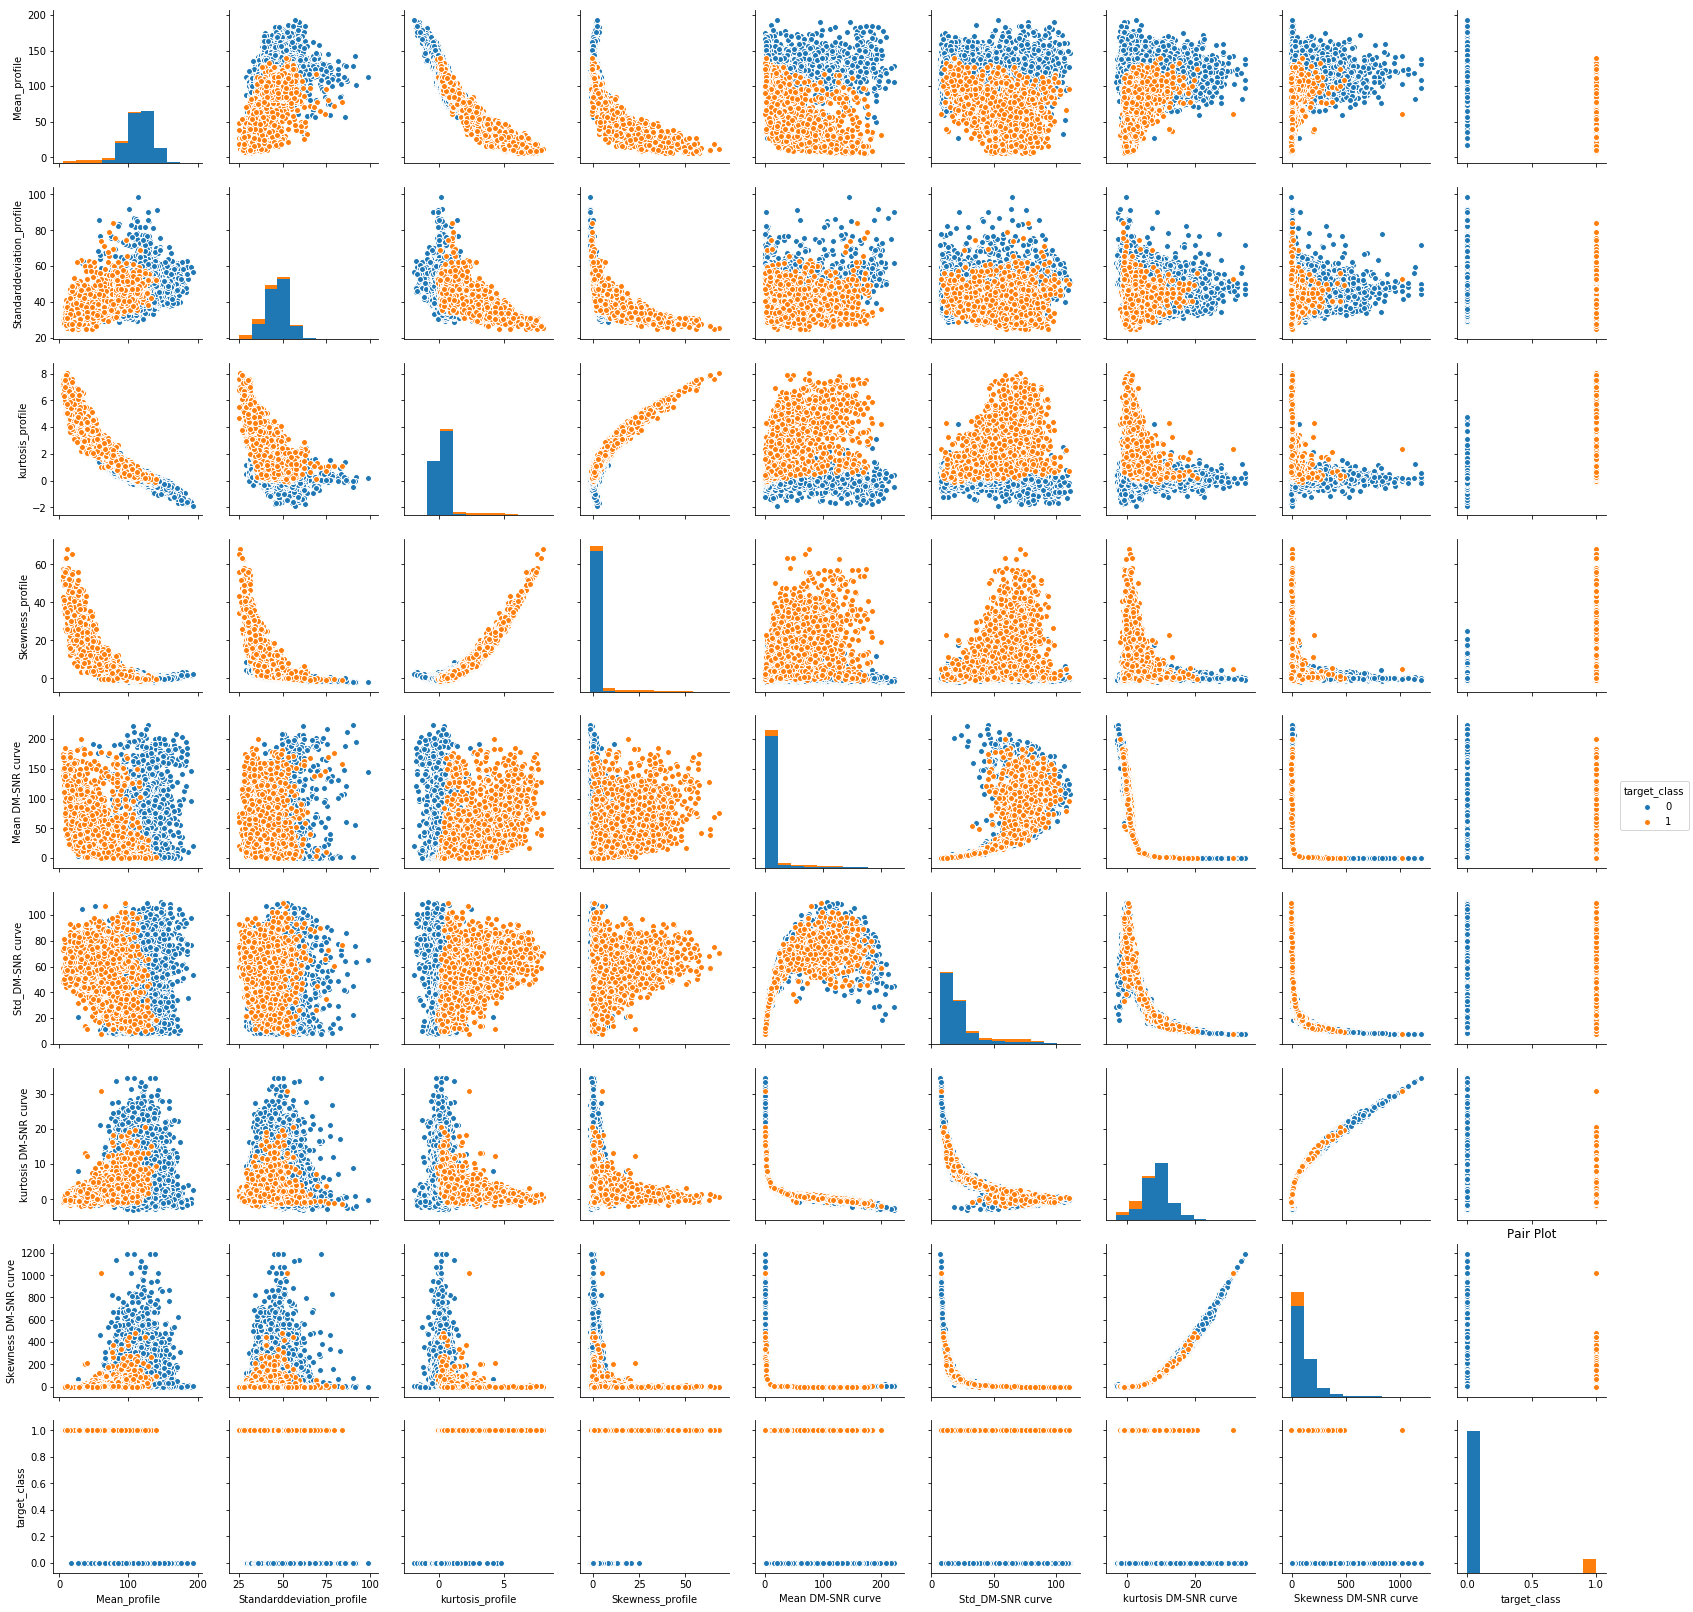

In [5]:
sb.pairplot(df,hue='target_class')
plt.title("Pair Plot")
plt.show()

Above figure shows different plots for variables. It shows whether the variables are affecting other variables or not depending on correlation with respect to target_class

#### Correlation between variables using HeatMap

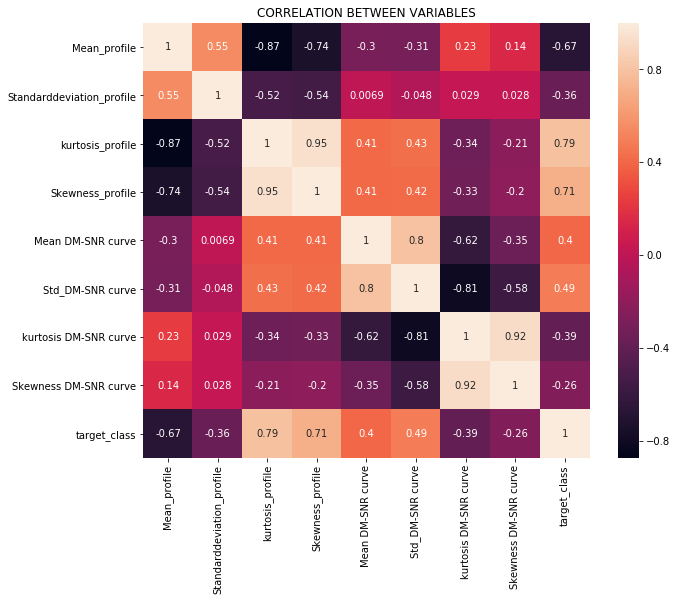

In [6]:
correlation = df.corr()
plt.figure(figsize=(10,8))
sb.heatmap(correlation,annot=True)
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()


above heatmap shows correlation between x & y co-ordinates. If the correlation is positive, changes to x will affect y and if the correlation is negative, changes to x will not affect y.

#### Plotting variables with higher correlation 

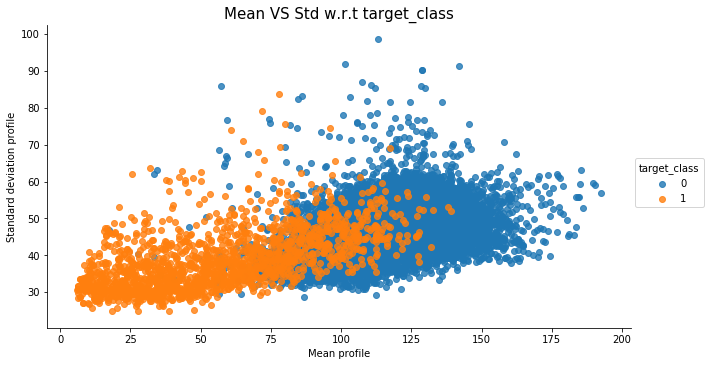

In [7]:
plt.figure(figsize = (10,5))
g=sb.lmplot(x="Mean_profile",y="Standarddeviation_profile", aspect=1.8,
                    data=df, hue="target_class", fit_reg=False)
plt.title("Mean VS Std w.r.t target_class", fontsize=15)
plt.xlabel("Mean profile")
plt.ylabel("Standard deviation profile")
plt.show()

Mean VS Std w.r.t target_class : As the mean_profile increases standard deviation profile increases slightly. In this plot, it is clear that most of the obersvations with mean_profile value less than 100 are considered as Pulsars and the observations with more than 100 mean_profile value are Non-Pulsars.  

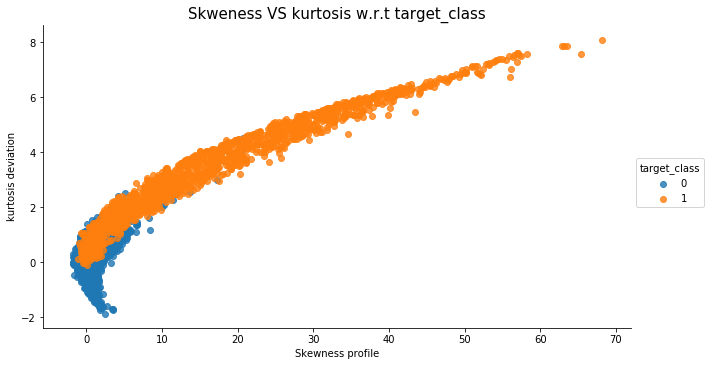

In [8]:
plt.figure(figsize = (10,5))
g=sb.lmplot(x="Skewness_profile",y="kurtosis_profile", aspect=1.8,
                    data=df, hue="target_class", fit_reg=False)
plt.title("Skweness VS kurtosis w.r.t target_class", fontsize=15)
plt.xlabel("Skewness profile")
plt.ylabel("kurtosis deviation")
plt.show()

Skweness VS kurtosis w.r.t target_class : In this plot As skewness profile have increase in the value, kurtosis deviation also increases. It can be said that the observations with kurtosis deviation value between 2 to -2 are Non-Pulsars. 

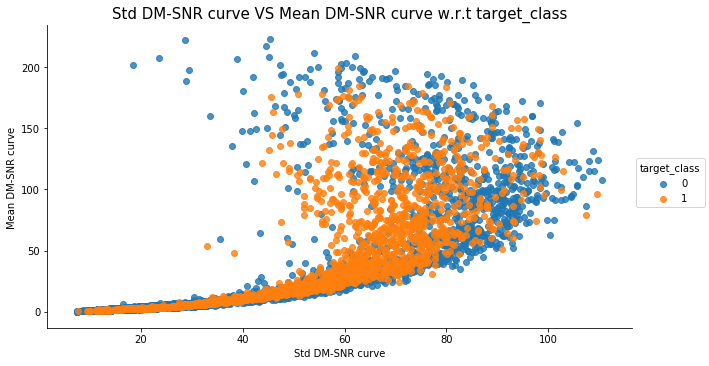

In [9]:
plt.figure(figsize = (10,5))
g=sb.lmplot(x="Std_DM-SNR curve",y="Mean DM-SNR curve", aspect=1.8,
                    data=df, hue="target_class", fit_reg=False)
plt.title("Std DM-SNR curve VS Mean DM-SNR curve w.r.t target_class", fontsize=15)
plt.xlabel("Std DM-SNR curve")
plt.ylabel("Mean DM-SNR curve ")
plt.show()

Std DM-SNR curve VS Mean DM-SNR curve w.r.t target_class : It is difficult to predict the contribution of std DM-SNR curve and Mean DM-SNR curve towards Non-Pulsars & Pulsars. Also, increase in std DM-SNR curve results in increase of Mean DM-SNR curve too.

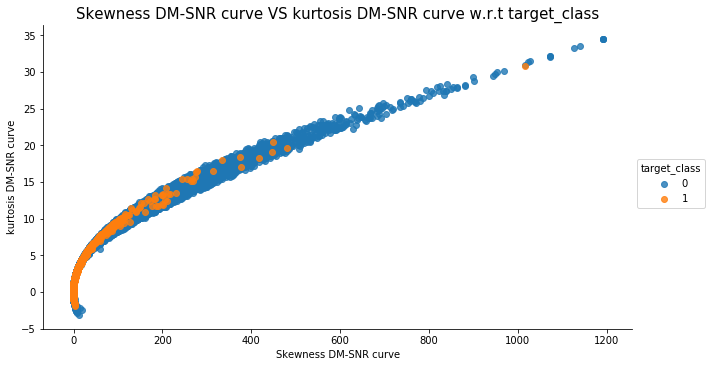

In [10]:
plt.figure(figsize = (10,5))
g=sb.lmplot(x="Skewness DM-SNR curve",y="kurtosis DM-SNR curve", aspect=1.8,
                    data=df, hue="target_class", fit_reg=False)
plt.title("Skewness DM-SNR curve VS kurtosis DM-SNR curve w.r.t target_class", fontsize=15)
plt.xlabel("Skewness DM-SNR curve")
plt.ylabel("kurtosis DM-SNR curve")
plt.show()

Skewness DM-SNR curve VS kurtosis DM-SNR curve w.r.t target_class : Here, for kurtosis DM-SNR curve between -1 to 15 and skewness DM-SNR curve between 0 to 200 are considered as Pulsars.

# III. Methods

### Summary of Classification models

#### Pocket Algorithm

The perceptron algorithm iterates over the training examples and update the weights in a way that would result in correct classification. But this algorithm keeps on updating the weights, if the weight fits the model perfectly or predict the output which is close to the real value it does not store it and this weight gets updated by the new weights. At the last iteration, this algorithm returns the last updated weights. To overcome this issue, pocket algorithm is used. Pocket algorithm keeps the best result seen so far in it's pocket. The best result means in this result the number of misclassification is minimum. If the new weights generate less number of misclassification than the stored weights, then it is replaced with the weights in it's pocket and the previous stored weights are removed from pocket. At the end of the iteration, the pocket algorithm returns the weights which was stored in the pocket rather than returning the last updated weights like perceptron algorithm.

#### QDA

In Quadratic Discriminant Analysis, the dataset splits into two classes such as one class consists values of the features contributing to the target value 1 and other class consists of the features which are contributing to the target value 0. The covariance matrix calculated is different for each class in QDA.
$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k) 
$$


Classificaton rule:
$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$
classification rule is used to find the class k which maximizes the quadratic discriminant function. The decision boundary is placed where the discriminant functions meet such as $\delta_1 == \delta_2$. The decision boundary generated is quadratic.
QDA allows for more flexibility for the covariance matrix which tends to fit the data better but it increases the number of parameters. As, QDA have separate covariance matrix for every class, if in our dataset we have many classes to consider then qda will have to calculate many covariance matrix as well which can be a problem.

#### LDA

Linear Discriminant Analysis is used to overcome the problem of QDA where it calculate different covariance matrix for every class present as maintaining the covariance matrix is not cheap. LDA is same as QDA, it splits the dataset into two classes such as one class consists values of the features contributing to the target value 1 and other class consists of the features which are contributing to the target value 0. But here LDA calculate one covariance matrix and apply same covariance on both the classes. Removing the quadratic term from discriminant function:

$$
\delta_k(x) = x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k)
$$

In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
\boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k
$$

#### Logistic Regression

If in our dataset target class consists of categorical data then using linear regression is not a good option, so logistic regression is used where the target variable is categorical like consider classification of animals like cat or dog. logistic regression represents this data using indicator variable, where the two values are labeled "0" and "1". Logistic regression is used to model the probability of a certain class like if the observation in the dataset gives the probability of 0.7 for dog, then that feature contributes in determining dog more. Each observation detected is assigned a probability between 0 and 1, if a certain observation's probability is above 0.5 then the instance belongs to that particular class or if it's below 0.5 then the instance belongs to other class.

Softmax transformation is used to generalize the logistic sigmoid function:

$$
\frac{\partial g_k}{\partial y_j}  = g_k (I_{kj} - g_j)
$$

Using the gradient, now we can update the weights, 

$$
w_j \leftarrow w_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(x_n)\Big) x_n
$$

Converting the summation into matrix calculation,

$$
w_j \leftarrow w_j + \alpha X^\top \Big(  t_{*,j} - g_j(X)\Big)
$$


### A. Super Classs Definition

In [11]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X-self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

Class Classifier inherits the properties of base model such as train and use functions. Here, classifier consists of :

> init() function for initializing of the variables, 

> normalize() function normalizes the dataset by substracting with the mean value of the dataset and dividing by the standard deviation of the dataset,

> check_matrix() function will check if the matrix's shape is 2 dimension or not,

> add_ones() function adds a bias in the matrix using np.hstack function.


### B. Pocket Algorithm


In [12]:
from copy import deepcopy as copy 

class Pocket(Classifier):
    
    def __init__(self):
        self.maxiter = 15
        self.alpha = 0.01
        self.w=None
        self.wp=None


    @staticmethod
    def compare(X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1

    def train(self,X,T):
        X=self.normalize(X)
        #T=self.normalize(T)
        self.w = np.zeros(X.shape[1])
        self.wp = copy(self.w)
        
        for i in range(self.maxiter):
            converged = True
            for k in range(X.shape[0]): 
                y = self.w @ X[k]
                #print(y)
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False 
                    #print(self.compare(X, T, self.w, self.wp))
                    if self.compare(X, T, self.w, self.wp) > 0:
                        self.wp[:]= self.w[:]
            if converged:
                print("converged at ", i)
                break
        print("End of training: ", i)
        print(self.wp)
    def use(self,X):
        X=self.normalize(X)
        return(np.sign(X@self.wp))


In class pocket,

> deepcopy module helps to deep copy all the contents into other variable

> init() function is used to initialize the variables maxiter, alpha, w and wp

> compare() function is used to calculate the product of X i.e feature and w i.e weights and the product of X and wp i.e weight stored in the pocket. it compares the values of y (X @ w) with target variable and yp (X @ wp) with target variable, if the sum of y == target variable is greater or equal to yp == target variable this function will return 1 if true and -1 if false.

> In train() function, normalize will call normalize function. weights are initialized to zeros and copied in the wp. for total number of observations in the dataset, it will calculate w @ X for ith value. If np.sign(y)!= np.sign(T for ith value), weights are updated here np.sign returns -1 for negative value and 1 for positive value. Then it calls the compare function to check if if np.sum(y == T) >= np.sum(yp == T) for the updated value of weights, if it returns 1 then the value of weights are stored in pocket (wp).

> use() function, will normalize the X (features for all observations). It will calculate X @ wp viz. the weights stored in the pocket. 

### C. QDA

In [13]:
class QDA(Classifier):
    
    def __init__(self):
        self.mu1=None
        self.mu2=None
        self.Sigma1=None
        self.Sigma2=None
        self.prior1=None
        self.prior2=None
        
    @staticmethod    
    def FQDA(X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1)+ np.log(prior)
    
    def train(self,Xtrain,Ttrain):
        Xtrain=self.normalize(Xtrain)
        X_all=np.append(Xtrain,Ttrain,axis=1)
        x1=X_all[X_all[:,-1]==0]
        x1=x1[:,:-1]

        x2=X_all[X_all[:,-1]==1]
        x2=x2[:,:-1]
        
        self.mu1 = np.mean(x1, 0)
        self.mu2 = np.mean(x2, 0)

        self.Sigma1 = np.cov(x1.T)
        self.Sigma2 = np.cov(x2.T)
        
        self.prior1 = (x1.shape[0]) / (x1.shape[0]+x2.shape[0])
        self.prior2 = (x2.shape[0]) / (x1.shape[0]+x2.shape[0])

    
    def use(self,X):
        self.d1 = self.FQDA(X, self.mu1, self.Sigma1, self.prior1)
        self.d2 = self.FQDA(X, self.mu2, self.Sigma2, self.prior2)
        
        predict=np.where(self.d1 > self.d2,0,1)
        return predict,self.d1,self.d2

In Class QDA,

> init() function is used for initializing the variables mu1, mu2, sigma1, sigma2, prior1 and prior2 to None.

> In FQDA() function, sigma inverse stores the inverse of a matrix such that if it is multiplied by the original matrix, it results in identical matrix. diffv stores the difference between X and mu. nplinalg.det will calculate the determinant of sigma.

> In train() function, Xtrain is normalized and X_all will store the normalized Xtrain and Ttrain. For value in Ttrain == 0, the features values in X_all are stored in x1 and for the value in Ttrain==1, the features values in X_all are stored in x2. mu1 and mu2 will store the mean on x1 and x2 for axis =0. sigma1 and sigma2 will store the covariances of x1 and x2. prior1 and prior2 will store the prior probabilities for x1 and x2.

> use() function calls FQDA function and stores the returned values in d1 and d2. predict will store the values of 0 if d1>d2 and 1 if not. Returns predict, d1 and d2 values 

### D. LDA

In [14]:
class LDA(Classifier):
    
    def __init__(self):
        self.mu1=None
        self.mu2=None
        self.Sigma=None
        self.prior1=None
        self.prior2=None
        
    @staticmethod    
    def FLDA(X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum((X @ sigma_inv) * mu - 0.5 * (mu @ sigma_inv) * mu, axis=1)+ np.log(prior)

    
    def train(self,Xtrain,Ttrain):
        Xtrain=self.normalize(Xtrain)
        X_all=np.append(Xtrain,Ttrain,axis=1)
        x1=X_all[X_all[:,-1]==0]
        x1=x1[:,:-1]

        x2=X_all[X_all[:,-1]==1]
        x2=x2[:,:-1]
        
        self.mu1 = np.mean(x1, 0)
        self.mu2 = np.mean(x2, 0)

        self.Sigma = np.cov(Xtrain.T)
        
        self.prior1 = (x1.shape[0]) / (x1.shape[0]+x2.shape[0])
        self.prior2 = (x2.shape[0]) / (x1.shape[0]+x2.shape[0])

    
    def use(self,X):
        X=self.normalize(X)
        self.d1 = self.FLDA(X, self.mu1, self.Sigma, self.prior1)
        self.d2 = self.FLDA(X, self.mu2, self.Sigma, self.prior2)
        
        predict=np.where(self.d1 > self.d2,0,1)
        return predict,self.d1,self.d2

In Class LDA,

> init() function is used for initializing the variables mu1, mu2, sigma, prior1 and prior2 to None.

> In FLDA() function, sigma inverse stores the inverse of a matrix such that if it is multiplied by the original matrix, it results in identical matrix.

> In train() function, Xtrain is normalized and X_all will store the normalized Xtrain and Ttrain. For value in Ttrain == 0, the features values in X_all are stored in x1 and for the value in Ttrain==1, the features values in X_all are stored in x2. mu1 and mu2 will store the mean on x1 and x2 for axis =0. sigma will store the covariances of Xtrain. prior1 and prior2 will store the prior probabilities for x1 and x2.

> use() function calls FLDA function and stores the returned values in d1 and d2. predict will store the values of 0 if d1>d2 and 1 if not. Returns predict, d1 and d2 values 

### E. Logistic Regression

In [15]:
class Log_Reg(Classifier):
    
    def __init__(self,alpha):
        self.w=None
        self.alpha=alpha
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))


    def g(self,X, w):
        return self.softmax(X @ w) 
    
    def train(self,X,T):
        X=self.normalize(X)
        self.w=np.zeros(((X.shape[1])+1,2))
        X=self.add_ones(X)
        T=self.add_ones(T.reshape(-1,1))
    
        (T[:,1])[T[:,1]==0]=0
        (T[:,0])[T[:,0]==1]=1
        #T[:,0],T[:,1]=T[:,1],T[:,0].copy()
        for i in range(100):
            y=self.g(X,self.w)
            self.w+=self.alpha*X.T@(T-y)
    
    def use(self,X):
        X=self.normalize(X)
        X=self.add_ones(X)
        return(self.g(X,self.w))

In Class Log_Reg,

> init() function will initialize w (weights) and alpha (learning rate)

> In softmax() function, np.exp will calculate the exponential value of z. here z is X @ w

> g() function returns softmax operation of X @ w

> train() function normalizes X and initialize the weights equal to zero using np.zeros. add_ones is called which will add bias to X and T. As logistic regression is used for categorical target values which is represented by 0 and 1. Now, T will have 2 columns representing 0s and 1s for a particular class. for 100 iterations, the weights will get updated according to the value of y.

> use() function will normalize X and add bias in X, returns g(w)

# IV. Experiments


In [16]:
def normalize(X):
    mu = X.mean() 
    std = X.std()
    return (X - mu) / std

As, the dataset includes various range of values. Here, normalization should be applied for changing the values in the dataset to common scale without distorting the ranges of values.
Normalization is also a step of preprocessing the data.

In [17]:
X=df.iloc[:,:-1]
T=df.iloc[:,-1].as_matrix()

def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

Xlst, Tlst=partition(pd.DataFrame(X),pd.DataFrame(T))

Xtrain, Xtest = [xx.as_matrix() for xx in Xlst]
Ttrain, Ttest = [tt.as_matrix() for tt in Tlst]

Here, partition function will partition the whole dataset into 80 - 20 split. i.e 80% of the data is used for training the model and 20% of the data is used for applying the learned techniques from the 80% data on it and predicting the output.

> Iterating through Xlst, the 80% of Xlst values is stored in Xtrain which will be used furthur for training and 20% of Xlst is stored in Xtest where the learned model will be used.

> Iterating through Tlst, the 80% of Tlst values is stored in Ttrain which will be used furthur for training and 20% of Tlst is stored in Ttest which is the actual value and can be used for comparison of actual value 'Ttest' and the predicted valued.

# 1. Pocket Experiment


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
scaler=StandardScaler()

Xp=df.iloc[:,:-1]
Tp=df.iloc[:,-1]

Xtrainp=Xp.iloc[:14319,:]
Ttrainp=Tp.iloc[:14319]
Xtestp=Xp.iloc[14319:,:]
Ttestp=Tp.iloc[14319:]

Xtrain_p=scaler.fit_transform(Xtrainp)
Xtest_p=scaler.fit_transform(Xtestp)
Ttrain_p=np.array(normalize(Ttrainp))
Ttest_p=np.array(Ttestp)
pocket=Pocket()
pocket.train(Xtrain_p,Ttrain_p)



End of training:  14
[ 0.04363826  0.0398937   0.23143855  0.12836723  0.01970816  0.03169484
  0.02505735 -0.06525277]


here, Ttrain is normalized using normalize function. Pocket classifier is initialized to pocket variable, then the classifier is passed to train function having parameter Xtrain and normalized Ttrain.  

In [19]:
ypoc_train=pocket.use(Xtrain_p)
Ttrain_norm=np.sign(Ttrain_p)

the trained classifier pocket is then used on the same training data Xtrain. As, normalized Ttrain have values in range -1 to 1 np.sign will bring that range in 0 to 1

In [20]:
Ttest_norm=normalize(Ttest_p)
ypoc_test=pocket.use(Xtest_p)
Ttest_norm=np.sign(Ttest_norm)

the trained classifier pocket is then used on the unseen data i.e Xtest. As, normalized Ttest have values in range -1 to 1 np.sign will bring that range in 0 to 1

## Discussion about Evaluation Metrics

#### Accuracy and F1 score of Trained Data

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print("Accuracy:", accuracy_score(Ttrain_norm,ypoc_train))
print("F1 score",f1_score(Ttrain_norm,ypoc_train))

Accuracy: 0.908303652489699
F1 score 0.692289664869932


Accuracy for the data on which the model was trained is 90% with the F1 score 69%

#### Confusion matrix of Trained Data

In [22]:
cf=confusion_matrix(Ttrain_norm, ypoc_train)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

Text(33,0.5,'True values')

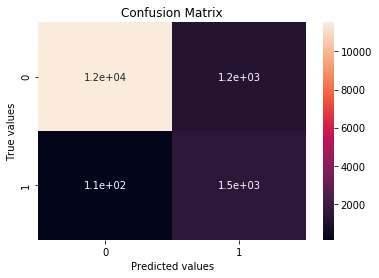

In [23]:
mtrx=plt.subplot()
sb.heatmap(cf,annot=True, ax=mtrx)
mtrx.set_title("Confusion Matrix")
mtrx.set_xlabel("Predicted values")
mtrx.set_ylabel("True values")

here, confusion_matrix will plot True positive, True Negative, False positive and False negative values in a matrix. Assigning those values to TP, TN, FN and FP

#### Precision, Recall and Specificity of Trained Data

In [24]:
precision=TP/(TP+FP)
recall=TP/(TP+FN)
specificity=TN/(TN+FP)

print("Precision : ",precision)
print("Recall : ",recall)
print("Specificity : ",specificity)
#pocket=Pocket()
#pocket.train(Xtrain,Ttrain)

Precision :  0.5509138381201044
Recall :  0.9312736443883984
Specificity :  0.9054425508521166


> precision is calculated by TP/(TP+FP)

> recall is calculated by TP/(TP+FN)

> specificity is calculated by TN/(TN+FP)

#### Accuracy and F1 score of Test Data

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print("Accuracy:", accuracy_score(Ttest_norm,ypoc_test))
print("F1 score",f1_score(Ttest_norm,ypoc_test))

Accuracy: 0.6504610226320201
F1 score 0.0753880266075388


Accuracy for the unseen data is 65% with F1 score 0.075.

#### Confusion matrix of Test Data

In [26]:
cf=confusion_matrix(Ttest_norm, ypoc_test)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

Text(33,0.5,'True values')

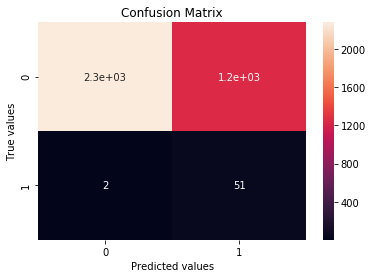

In [27]:
mtrx=plt.subplot()
sb.heatmap(cf,annot=True, ax=mtrx)
mtrx.set_title("Confusion Matrix")
mtrx.set_xlabel("Predicted values")
mtrx.set_ylabel("True values")

here, confusion_matrix will plot True positive, True Negative, False positive and False negative values in a matrix. Assigning those values to TP, TN, FN and FP

#### Precision, Recall and Specificity of Test Data

In [28]:
precision=TP/(TP+FP)
recall=TP/(TP+FN)
specificity=TN/(TN+FP)

print("Precision : ",precision)
print("Recall : ",recall)
print("Specificity : ",specificity)
#pocket=Pocket()
#pocket.train(Xtrain,Ttrain)

Precision :  0.03923076923076923
Recall :  0.9622641509433962
Specificity :  0.6457742484401588


> precision is calculated by TP/(TP+FP)

> recall is calculated by TP/(TP+FN)

> specificity is calculated by TN/(TN+FP)

#### ROC AUC score

In [29]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
roc_auc_score(Ttest_norm,ypoc_test)

0.8040191996917775

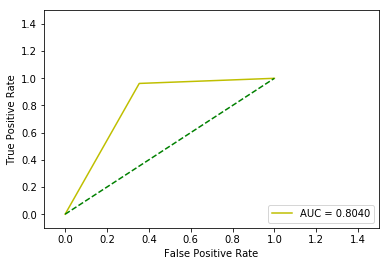

In [30]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Ttest_norm, ypoc_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'y',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'g--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Discussion about Train and Test accuracies

Text(0.5,1,'Prediction on Testing Data')

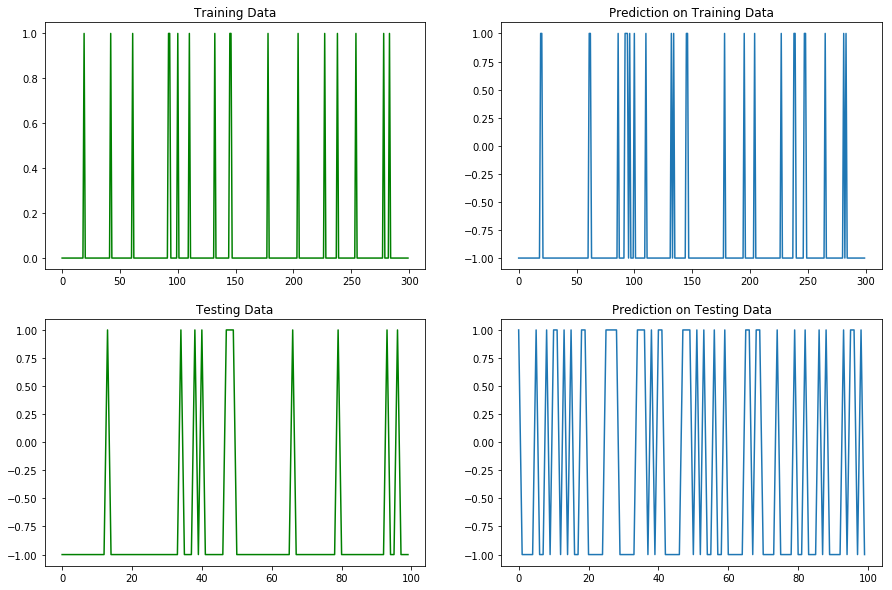

In [31]:
fig, axs= plt.subplots(2,2,figsize=(15,10))
axs[0,0].plot(Ttrain[:300],color="green")
axs[0,0].set_title("Training Data")
axs[0,1].plot(ypoc_train[:300])
axs[0,1].set_title("Prediction on Training Data")
axs[1,0].plot(Ttest_norm[:100],color="green")
axs[1,0].set_title("Testing Data")
axs[1,1].plot(ypoc_test[:100])
axs[1,1].set_title("Prediction on Testing Data")


Text(0.5,1,'Testing Data VS Prediction on Testing Data')

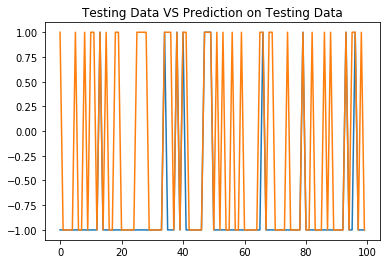

In [32]:
plt.plot(Ttest_norm[:100])
plt.plot(ypoc_test[:100])
plt.title("Testing Data VS Prediction on Testing Data")

> Accuracy on training data : 0.908303652489699

> Accuracy on testing data  : 0.6504610226320201

Pocket algorithm performed well on training data (on which the model was trained) with 90% accuracy while 65% accuracy on testing data (the data which was unseen from the model).

# 2. QDA Experiment

In [33]:
qda=QDA()
qda.train(Xtrain,Ttrain)

QDA classifier is initialized to qda variable and it is passed to train function in QDA class which have parameters Xtrain and Ttrain.

In [34]:
yqda_train,s1,s2=qda.use(Xtrain)
yqda_test,s1,s2=qda.use(Xtest)

the trained model is then used on training data Xtrain and testing data Xtest 

## Discussion about Evaluation Metrics

#### Accuracy and F1 score of Trained Data

In [35]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print("Accuracy:", accuracy_score(Ttrain,yqda_train))
print("F1 score",f1_score(Ttrain,yqda_train))

Accuracy: 0.9542533873446012
F1 score 0.7432379459035673


on the training data the model have an accuracy of 95% and F1 score of 74%

#### Confusion Matrix of Trained Data

In [36]:
cf=confusion_matrix(Ttrain, yqda_train)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

Text(33,0.5,'True values')

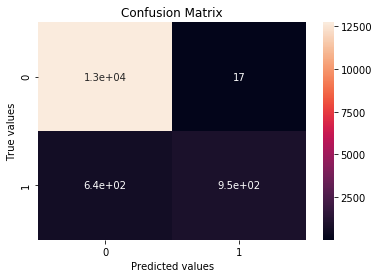

In [37]:
mtrx=plt.subplot()
sb.heatmap(cf,annot=True, ax=mtrx)
mtrx.set_title("Confusion Matrix")
mtrx.set_xlabel("Predicted values")
mtrx.set_ylabel("True values")

here, confusion_matrix will plot True positive, True Negative, False positive and False negative values in a matrix. Assigning those values to TP, TN, FN and FP

#### Precision, Recall and Specificity of Trained Data 

In [38]:
precision=TP/(TP+FP)
recall=TP/(TP+FN)
specificity=TN/(TN+FP)

print("Precision : ",precision)
print("Recall : ",recall)
print("Specificity : ",specificity)
#pocket=Pocket()
#pocket.train(Xtrain,Ttrain)

Precision :  0.9823834196891191
Recall :  0.5977301387137453
Specificity :  0.998664781652529


> precision is calculated by TP/(TP+FP)

> recall is calculated by TP/(TP+FN)

> specificity is calculated by TN/(TN+FP)

#### Accuracy and F1 score of Test Data

In [39]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print("Accuracy:", accuracy_score(Ttest,yqda_test))
print("F1 score",f1_score(Ttest,yqda_test))

Accuracy: 0.9910614525139665
F1 score 0.6190476190476191


on the testing data the model have an accuracy of 99% and F1 score of 61%

#### Confusion Matrix of Test Data

In [40]:
cf=confusion_matrix(Ttest, yqda_test)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

Text(33,0.5,'True values')

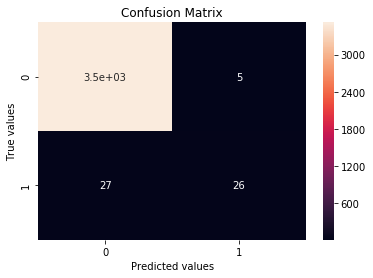

In [41]:
mtrx=plt.subplot()
sb.heatmap(cf,annot=True, ax=mtrx)
mtrx.set_title("Confusion Matrix")
mtrx.set_xlabel("Predicted values")
mtrx.set_ylabel("True values")

here, confusion_matrix will plot True positive, True Negative, False positive and False negative values in a matrix. Assigning those values to TP, TN, FN and FP

#### Precision, Recall and Specificity of Test Data

In [42]:
precision=TP/(TP+FP)
recall=TP/(TP+FN)
specificity=TN/(TN+FP)

print("Precision : ",precision)
print("Recall : ",recall)
print("Specificity : ",specificity)
#pocket=Pocket()
#pocket.train(Xtrain,Ttrain)

Precision :  0.8387096774193549
Recall :  0.49056603773584906
Specificity :  0.9985823646158208


> precision is calculated by TP/(TP+FP)

> recall is calculated by TP/(TP+FN)

> specificity is calculated by TN/(TN+FP)

#### ROC AUC score

In [43]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
roc_auc_score(Ttest,yqda_test)

0.7445742011758348

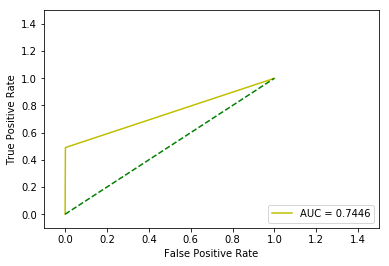

In [44]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Ttest, yqda_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'y',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'g--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

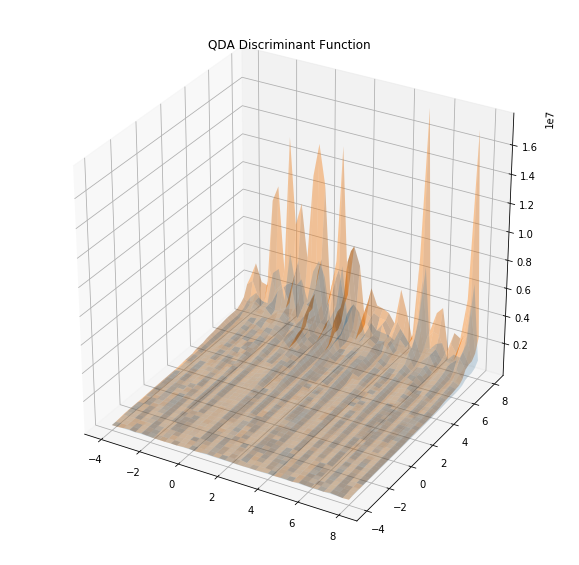

In [45]:
from mpl_toolkits.mplot3d import Axes3D
p,d1,d2 = qda.use(Xtest[:1600])
xs, ys = np.meshgrid(np.linspace(-4,8, 40), np.linspace(-4,8, 40))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d1.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d2.reshape(xs.shape),0), alpha=0.4)
plt.title("QDA Discriminant Function")
plt.show()

Text(0.5,1,'Decision Boundary')

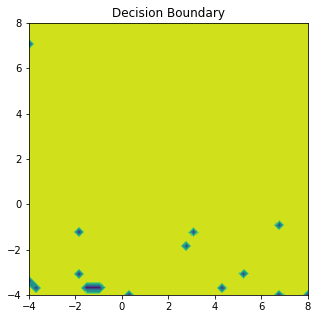

In [46]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, (d1-d2 > 0).reshape(xs.shape))
plt.title("Decision Boundary")

## Discussion about Train and Test accuracies

Text(0.5,1,'Prediction on Testing Data')

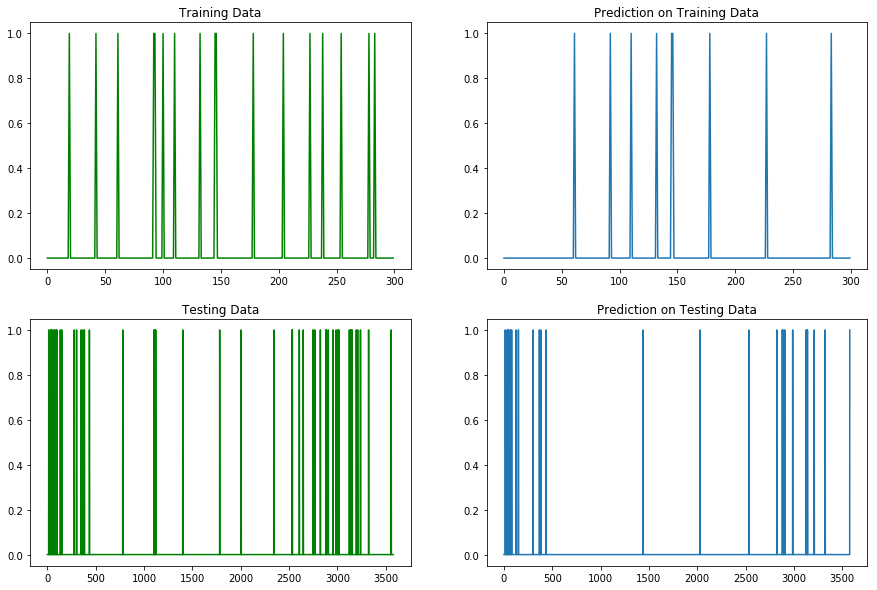

In [47]:
fig, axs= plt.subplots(2,2,figsize=(15,10))
axs[0,0].plot(Ttrain[:300],color="green")
axs[0,0].set_title("Training Data")
axs[0,1].plot(yqda_train[:300])
axs[0,1].set_title("Prediction on Training Data")
axs[1,0].plot(Ttest,color="green")
axs[1,0].set_title("Testing Data")
axs[1,1].plot(yqda_test)
axs[1,1].set_title("Prediction on Testing Data")


Text(0.5,1,'Testing Data VS Prediction on Testing Data')

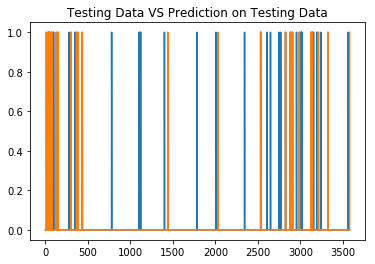

In [48]:
plt.plot(Ttest)
plt.plot(yqda_test)
plt.title("Testing Data VS Prediction on Testing Data")

> Accuracy on training data : 0.9542533873446012

> Accuracy on testing data  : 0.9910614525139665

QDA algorithm performed well on testing data (the data which was unseen from the model) with 99% accuracy while 95% accuracy on training data (on which the model was trained).

# 3. LDA Experiment

In [49]:
lda=LDA()
lda.train(Xtrain,Ttrain)


LDA classifier is initialized to lda variable and it is passed to train function in LDA class which have parameters Xtrain and Ttrain.

In [50]:
ylda_train,d1,d2=lda.use(Xtrain)
ylda_test,d1,d2=lda.use(Xtest)

the trained model is then used on training data Xtrain and testing data Xtest 

## Discussion about Evaluation Metrics

#### Accuracy and F1 score of Trained Data

In [51]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print("Accuracy:", accuracy_score(Ttrain,ylda_train))
print("F1 score",f1_score(Ttrain,ylda_train))

Accuracy: 0.9603994971364715
F1 score 0.7859569648924121


on the training data the model have an accuracy of 96% and F1 score of 78%

#### Confusion Matrix of Trained Data

In [52]:
cf=confusion_matrix(Ttrain, ylda_train)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

Text(33,0.5,'True values')

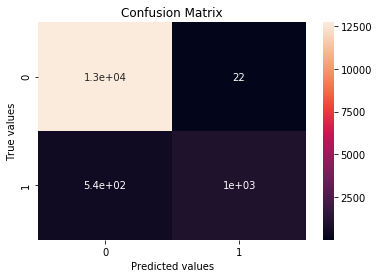

In [53]:
mtrx=plt.subplot()
sb.heatmap(cf,annot=True, ax=mtrx)
mtrx.set_title("Confusion Matrix")
mtrx.set_xlabel("Predicted values")
mtrx.set_ylabel("True values")

here, confusion_matrix will plot True positive, True Negative, False positive and False negative values in a matrix. Assigning those values to TP, TN, FN and FP

#### Precision, Recall and Specificity of Trained Data 

In [54]:
precision=TP/(TP+FP)
recall=TP/(TP+FN)
specificity=TN/(TN+FP)

print("Precision : ",precision)
print("Recall : ",recall)
print("Specificity : ",specificity)


Precision :  0.9793038570084666
Recall :  0.6563682219419924
Specificity :  0.9982720703738611


> precision is calculated by TP/(TP+FP)

> recall is calculated by TP/(TP+FN)

> specificity is calculated by TN/(TN+FP)

#### Accuracy and F1 score of Test Data

In [55]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print("Accuracy:", accuracy_score(Ttest,ylda_test))
print("F1 score",f1_score(Ttest,ylda_test))

Accuracy: 0.9863128491620111
F1 score 0.6573426573426574


on the testing data the model have an accuracy of 98% and F1 score of 65%

#### Confusion Matrix of Test Data

In [56]:
cf=confusion_matrix(Ttest, ylda_test)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

Text(33,0.5,'True values')

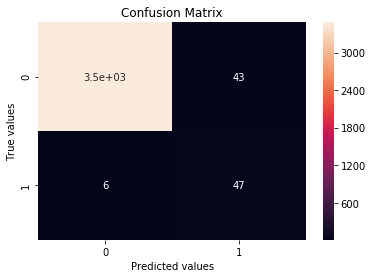

In [57]:
mtrx=plt.subplot()
sb.heatmap(cf,annot=True, ax=mtrx)
mtrx.set_title("Confusion Matrix")
mtrx.set_xlabel("Predicted values")
mtrx.set_ylabel("True values")

here, confusion_matrix will plot True positive, True Negative, False positive and False negative values in a matrix. Assigning those values to TP, TN, FN and FP

#### Precision, Recall and Specificity of Test Data

In [58]:
precision=TP/(TP+FP)
recall=TP/(TP+FN)
specificity=TN/(TN+FP)

print("Precision : ",precision)
print("Recall : ",recall)
print("Specificity : ",specificity)

Precision :  0.5222222222222223
Recall :  0.8867924528301887
Specificity :  0.987808335696059


> precision is calculated by TP/(TP+FP)

> recall is calculated by TP/(TP+FN)

> specificity is calculated by TN/(TN+FP)

#### ROC AUC score

In [59]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
roc_auc_score(Ttest,ylda_test)

0.9373003942631238

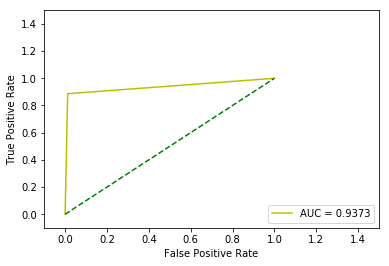

In [60]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Ttest, ylda_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'y',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'g--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

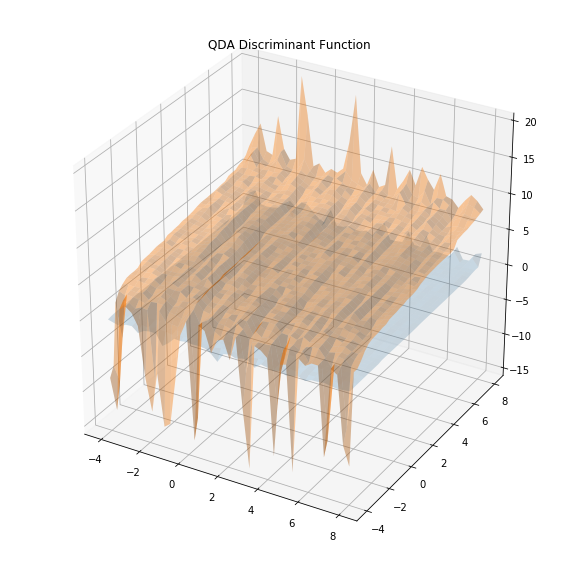

In [61]:
from mpl_toolkits.mplot3d import Axes3D
p,d1,d2 = lda.use(Xtest[:1600])
xs, ys = np.meshgrid(np.linspace(-4,8, 40), np.linspace(-4,8, 40))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d1.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d2.reshape(xs.shape),0), alpha=0.4)
plt.title("QDA Discriminant Function")
plt.show()

Text(0.5,1,'Decision Boundary')

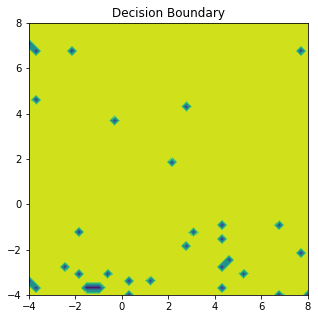

In [62]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, (d1-d2 > 0).reshape(xs.shape))
plt.title("Decision Boundary")

## Discussion about Train and Test accuracies

Text(0.5,1,'Prediction on Testing Data')

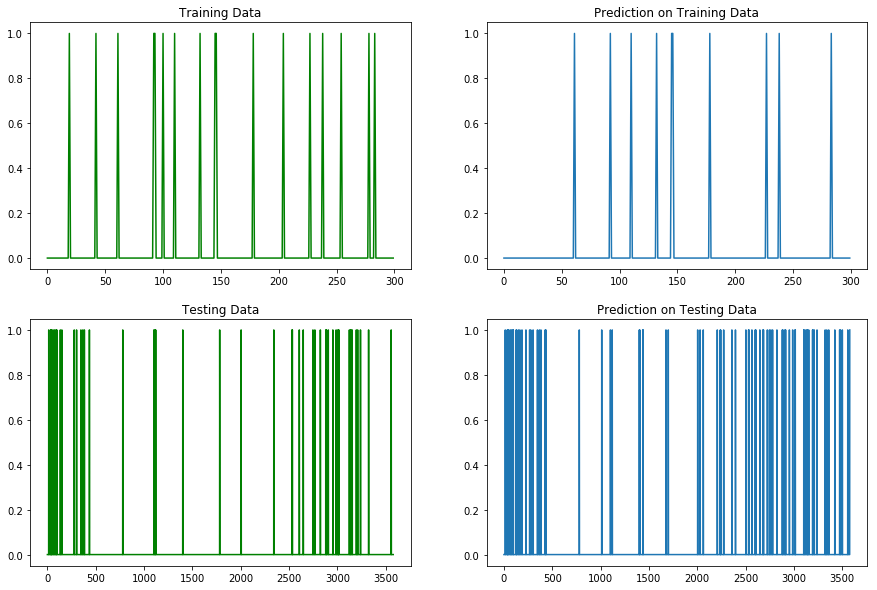

In [63]:
fig, axs= plt.subplots(2,2,figsize=(15,10))
axs[0,0].plot(Ttrain[:300],color="green")
axs[0,0].set_title("Training Data")
axs[0,1].plot(ylda_train[:300])
axs[0,1].set_title("Prediction on Training Data")
axs[1,0].plot(Ttest,color="green")
axs[1,0].set_title("Testing Data")
axs[1,1].plot(ylda_test)
axs[1,1].set_title("Prediction on Testing Data")


Text(0.5,1,'Testing Data VS Prediction on Testing Data')

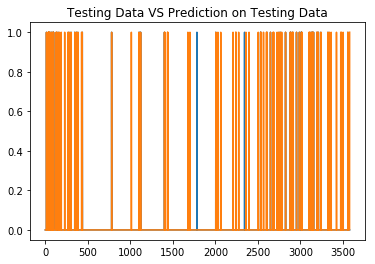

In [64]:
plt.plot(Ttest)
plt.plot(ylda_test)
plt.title("Testing Data VS Prediction on Testing Data")

> Accuracy on training data : 0.9603994971364715

> Accuracy on testing data  : 0.9863128491620111

LDA algorithm performed well on testing data (the data which was unseen from the model) with 98% accuracy while 96% accuracy on training data (on which the model was trained).

# 4. Logistic Regression Experiment

In [65]:
log_reg=Log_Reg(0.00001)
log_reg.train(Xtrain,np.array(Ttrain))

Log_Reg classifier is initialized to log_reg and it is passed to train function in Log_Reg class which have parameters Xtrain and Ttrain

In [66]:
ylog_reg_train=log_reg.use(Xtrain)
ylog_reg_train=np.argmax(ylog_reg_train,1)

ylog_reg_test=log_reg.use(Xtest)
ylog_reg_test=np.argmax(ylog_reg_test,1)

the trained model is then used on the training data Xtrain and testing data Xtest, as there are binary values in ylog_reg_train and ylog_reg_test np.argmax is used.

## Discussion about Evaluation Metrics

#### Accuracy and F1 score of Trained Data

In [67]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print("Accuracy:", accuracy_score(Ttrain,ylog_reg_train))
print("F1 score",f1_score(Ttrain,ylog_reg_train))

Accuracy: 0.9224752060343624
F1 score 0.46324951644100587


on the training data the model gives accuracy of 92% and F1 score of 46%

#### Confusion Matrix of Trained Data

In [68]:
cf=confusion_matrix(Ttrain, ylog_reg_train)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

Text(33,0.5,'True values')

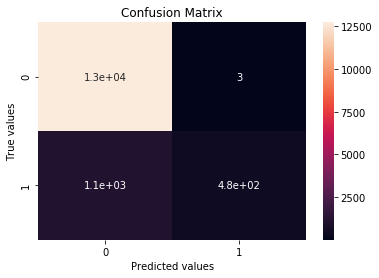

In [69]:
mtrx=plt.subplot()
sb.heatmap(cf,annot=True, ax=mtrx)
mtrx.set_title("Confusion Matrix")
mtrx.set_xlabel("Predicted values")
mtrx.set_ylabel("True values")

here, confusion_matrix will plot True positive, True Negative, False positive and False negative values in a matrix. Assigning those values to TP, TN, FN and FP

In [70]:
precision=TP/(TP+FP)
recall=TP/(TP+FN)
specificity=TN/(TN+FP)

print("Precision : ",precision)
print("Recall : ",recall)
print("Specificity : ",specificity)

Precision :  0.9937759336099585
Recall :  0.3020176544766709
Specificity :  0.9997643732327992


> precision is calculated by TP/(TP+FP)

> recall is calculated by TP/(TP+FN)

> specificity is calculated by TN/(TN+FP)

#### Accuracy and F1 score of Test Data

In [71]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print("Accuracy:", accuracy_score(Ttest,ylog_reg_test))
print("F1 score",f1_score(Ttest,ylog_reg_test))

Accuracy: 0.9916201117318436
F1 score 0.6739130434782609


on the testing data the model gives an accuracy of 99% and F1 score of 67%

#### Confusion Matrix of Test Data

In [72]:
cf=confusion_matrix(Ttest, ylog_reg_test)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

Text(33,0.5,'True values')

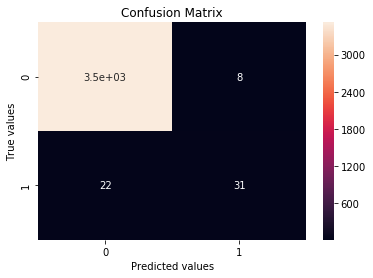

In [73]:
mtrx=plt.subplot()
sb.heatmap(cf,annot=True, ax=mtrx)
mtrx.set_title("Confusion Matrix")
mtrx.set_xlabel("Predicted values")
mtrx.set_ylabel("True values")

here, confusion_matrix will plot True positive, True Negative, False positive and False negative values in a matrix. Assigning those values to TP, TN, FN and FP

In [74]:
precision=TP/(TP+FP)
recall=TP/(TP+FN)
specificity=TN/(TN+FP)

print("Precision : ",precision)
print("Recall : ",recall)
print("Specificity : ",specificity)

Precision :  0.7948717948717948
Recall :  0.5849056603773585
Specificity :  0.9977317833853133


> precision is calculated by TP/(TP+FP)

> recall is calculated by TP/(TP+FN)

> specificity is calculated by TN/(TN+FP)

#### ROC AUC score

In [75]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
roc_auc_score(Ttest,ylog_reg_test)

0.791318721881336

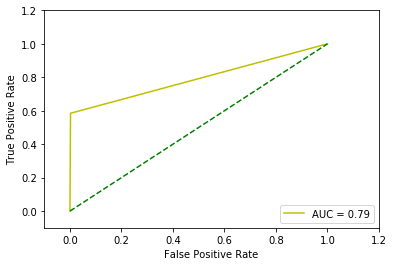

In [76]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Ttest, ylog_reg_test)
roc_auc = auc(false_positive_rate, true_positive_rate)


##Plotting now
plt.plot(false_positive_rate, true_positive_rate, 'y',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'g--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Discussion about Train and Test Accuracies

Text(0.5,1,'Prediction on Testing Data')

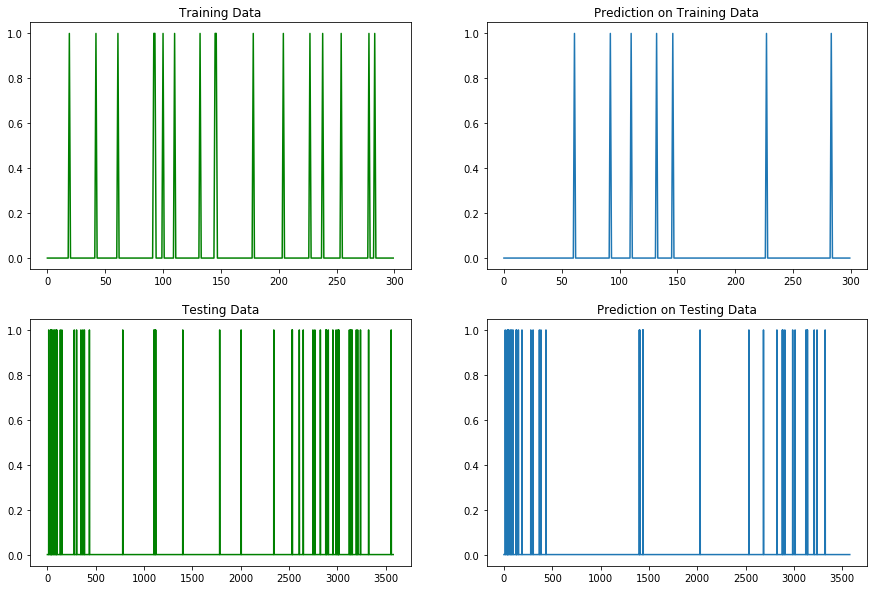

In [77]:
fig, axs= plt.subplots(2,2,figsize=(15,10))
axs[0,0].plot(Ttrain[:300],color="green")
axs[0,0].set_title("Training Data")
axs[0,1].plot(ylog_reg_train[:300])
axs[0,1].set_title("Prediction on Training Data")
axs[1,0].plot(Ttest,color="green")
axs[1,0].set_title("Testing Data")
axs[1,1].plot(ylog_reg_test)
axs[1,1].set_title("Prediction on Testing Data")

Text(0.5,1,'Testing Data VS Prediction on Testing Data')

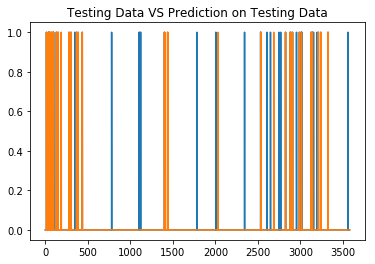

In [78]:
plt.plot(Ttest)
plt.plot(ylog_reg_test)
plt.title("Testing Data VS Prediction on Testing Data")

> Accuracy on training data : 0.9224752060343624

> Accuracy on testing data  : 0.9916201117318436

Logistic Regression algorithm performed well on testing data (the data which was unseen from the model) with 99% accuracy while 92% accuracy on training data (on which the model was trained).

### Discussions about Classification Model Comparison

In Pocket Algorithm,
> Accuracy on training data : 0.8893700237463333

> Accuracy on testing data : 0.6324022346368715


Pocket algorithm performed well on training data with 88% accuracy compairing to the testing data with 63% accuracy. We can say our Model is overfitting


In QDA Algorithm,
> Accuracy on training data : 0.9542533873446012

> Accuracy on testing data : 0.9910614525139665


QDA algorithm performed well on testing data with 99% accuracy compairing to the training data with 95% accuracy.

In LDA Algorithm,
>Accuracy on training data : 0.9603994971364715

>Accuracy on testing data : 0.9863128491620111


LDA algorithm performed well on testing data (the data which was unseen from the model) with 98% accuracy while 96% accuracy on training data (on which the model was trained)

In Logistic Regression,
> Accuracy on training data : 0.9224752060343624

> Accuracy on testing data : 0.9916201117318436


Logistic Regression algorithm performed well on testing data (the data which was unseen from the model) with 99% accuracy while 92% accuracy on training data (on which the model was trained).

Compairing all the algorithms together, pocket algorithm performed very poorly on testing data even if it performed quite well on the training data. Pocket algorithm is overfitting. QDA performed very well on testing data with 99% accuracy than training data. LDA performace is quite similar to QDA where one covariance is used rather than using different covariance for every class as in QDA. Logistic regression performed very well than all the other algorithms having accuracy of 99% on testing data (unseen data). 

 # Conclusions

QDA and Logistic regression performed very well on both training and testing data than LDA and pocket algorithm. Pocket algorithm performance was very poor with accuracy of 88% on training data and 63% on testing data.
Before performing computation on the dataset it is better to perform preprocessing on the dataset. In preprocessing stage, checking for a null value as the null value might affect the predicted value. For removing null values, calculating the mean of a certain column where null value is found is an option. Also, it is best to aviod or drop the feature which is not contributing for calculating the target value. Also, normalization of the dataset is required because there are different features in the dataset with various range which might affect while predicting the values. Normalizing the data in the common scale without distorting the ranges of values. Splitting function of the dataset in Xtrain, Ttrain and Xtest, Ttest variables where 80% and 20% of the data is split which can be furthur used for training and applying the trained model on unseen data. In visualization, seaborn library have various functions to plot a certain variable in different ways. for example, seaborn's lmplot function helps to plot the x and y coordinates with respect to other varible using hue parameter, it also have various parameters like aspect which can adjust the aspect ratio of the plot. Matplotlib grid, subplots function which helps to plot 4 subplots in same figure which is helpful for comparison of the plots. Compairing the model based on it's evaluation metrics gives us better view of how a model is performing.

# References

[1] R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach, Monthly Notices of the Royal Astronomical Society 459 (1), 1104-1123, DOI: 10.1093/mnras/stw656 https://archive.ics.uci.edu/ml/datasets/HTRU2

[2] Lee, Prof. Minwoo Jake. “Note-Linear Classification.”
https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Classification.sol.ipynb

[3] Lee, Prof. Minwoo Jake. “Note-Classification.”
https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Classification.ipynb

[4] PennState: Statistics Online Courses “Quadratic Discriminant Analysis (QDA)." 
https://onlinecourses.science.psu.edu/stat508/book/export/html/696

[5] Raschka, Dr. Sebastian. “Linear Discriminant Analysis.” , 3 Aug. 2014, https://sebastianraschka.com/Articles/2014_python_lda.html.

# Extra Credit

* Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

## Using Pocket

### Testing on Set 1

In [79]:
df1=df.iloc[:3579,:]
df2=df.iloc[3579:7158,:]
df3=df.iloc[7158:10737,:]
df4=df.iloc[10737:14316,:]
df5=df.iloc[14316:,:]

Xtrain_ec1=pd.concat([df2,df3,df4,df5])
Xtrain_ec2=pd.concat([df1,df3,df4,df5])
Xtrain_ec3=pd.concat([df1,df2,df4,df5])
Xtrain_ec4=pd.concat([df1,df2,df3,df5])
Xtrain_ec5=pd.concat([df1,df2,df3,df4])


In [80]:
Ttrain_ec1=Xtrain_ec1['target_class']
Xtrain_ec1=Xtrain_ec1.drop(['target_class'],axis=1)

In [81]:
Ttest_ec1=df1['target_class']
Xtest_ec1=df1.drop(['target_class'],axis=1)

In [82]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

Xtrain_ec1=scaler.fit_transform(Xtrain_ec1)
Xtest_ec1=scaler.fit_transform(Xtest_ec1)
Ttrain_ec1=np.array(normalize(Ttrain_ec1))
Ttest_ec1=np.array(Ttest_ec1)

In [83]:
p=Pocket()
p.train(Xtrain_ec1,Ttrain_ec1)

End of training:  14
[ 0.08304313  0.01353805  0.17442335  0.17295837 -0.0151713   0.00245636
  0.05217557 -0.04353747]


In [84]:
y1=p.use(Xtest_ec1)
y1[y1==-1]=0

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print("Accuracy : ",accuracy_score(Ttest_ec1,y1))
print("F1 score : ",f1_score(Ttest_ec1,y1))

Accuracy :  0.943280245878737
F1 score :  0.7711386696730553


Text(0.5,1,'Predicted Ttest')

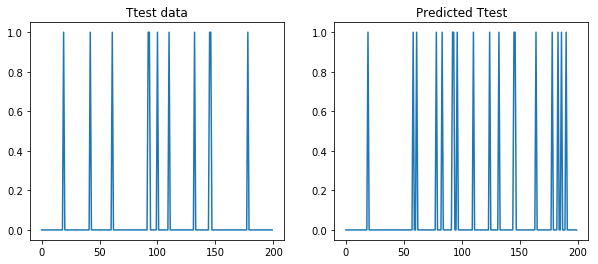

In [86]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_ec1[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(y1[:200])
plt.title("Predicted Ttest")

### Testing on Set 2

In [87]:
Ttrain_ec2=Xtrain_ec2['target_class']
Xtrain_ec2=Xtrain_ec2.drop(['target_class'],axis=1)

Ttest_ec2=df2['target_class']
Xtest_ec2=df2.drop(['target_class'],axis=1)

In [88]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

Xtrain_ec2=scaler.fit_transform(Xtrain_ec2)
Xtest_ec2=scaler.fit_transform(Xtest_ec2)
Ttrain_ec2=np.array(normalize(Ttrain_ec2))
Ttest_ec2=np.array(Ttest_ec2)

In [89]:
p=Pocket()
p.train(Xtrain_ec2,Ttrain_ec2)

End of training:  14
[ 0.06663969  0.0391741   0.14697262  0.16213505  0.14716495  0.11241791
 -0.01804582 -0.06061875]


In [90]:
y2=p.use(Xtest_ec2)
y2[y2==-1]=0

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print("Accuracy : ",accuracy_score(Ttest_ec2,y2))
print("F1 score : ",f1_score(Ttest_ec2,y2))

Accuracy :  0.8644872869516624
F1 score :  0.6601261387526278


Text(0.5,1,'Predicted Ttest')

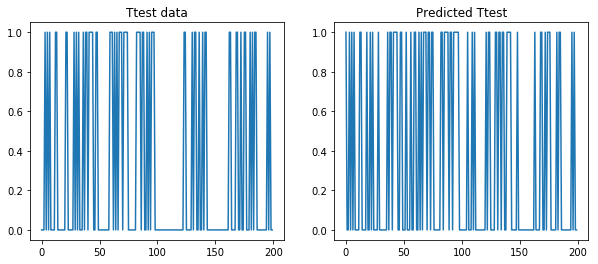

In [92]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_ec2[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(y2[:200])
plt.title("Predicted Ttest")

### Testing on Set 3

In [93]:
Ttrain_ec3=Xtrain_ec3['target_class']
Xtrain_ec3=Xtrain_ec3.drop(['target_class'],axis=1)

Ttest_ec3=df3['target_class']
Xtest_ec3=df3.drop(['target_class'],axis=1)

In [94]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

Xtrain_ec3=scaler.fit_transform(Xtrain_ec3)
Xtest_ec3=scaler.fit_transform(Xtest_ec3)
Ttrain_ec3=np.array(normalize(Ttrain_ec3))
Ttest_ec3=np.array(Ttest_ec3)

In [95]:
p=Pocket()
p.train(Xtrain_ec3,Ttrain_ec3)

End of training:  14
[ 0.07531836  0.02795197  0.19232094  0.18867333 -0.0309001   0.01935243
  0.05848302 -0.04286719]


In [96]:
y3=p.use(Xtest_ec3)
y3[y3==-1]=0
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print("Accuracy : ",accuracy_score(Ttest_ec3,y3))
print("F1 score : ",f1_score(Ttest_ec3,y3))

Accuracy :  0.9480301760268232
F1 score :  0.762148337595908


Text(0.5,1,'Predicted Ttest')

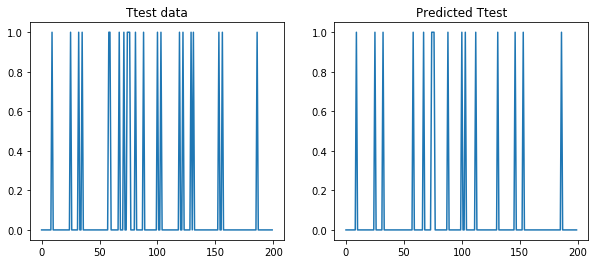

In [97]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_ec3[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(y3[:200])
plt.title("Predicted Ttest")

### Testing on Set 4

In [98]:
Ttrain_ec4=Xtrain_ec4['target_class']
Xtrain_ec4=Xtrain_ec4.drop(['target_class'],axis=1)

Ttest_ec4=df4['target_class']
Xtest_ec4=df4.drop(['target_class'],axis=1)

In [99]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

Xtrain_ec4=scaler.fit_transform(Xtrain_ec4)
Xtest_ec4=scaler.fit_transform(Xtest_ec4)
Ttrain_ec4=np.array(normalize(Ttrain_ec4))
Ttest_ec4=np.array(Ttest_ec4)

In [100]:
p=Pocket()
p.train(Xtrain_ec4,Ttrain_ec4)

End of training:  14
[ 0.05550751  0.00601247  0.127689    0.12911826 -0.00588609 -0.01630331
  0.04493131 -0.0373078 ]


In [101]:
y4=p.use(Xtest_ec4)
y4[y4==-1]=0
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print("Accuracy : ",accuracy_score(Ttest_ec4,y4))
print("F1 score : ",f1_score(Ttest_ec4,y4))

Accuracy :  0.8921486448728695
F1 score :  0.5593607305936074


Text(0.5,1,'Predicted Ttest')

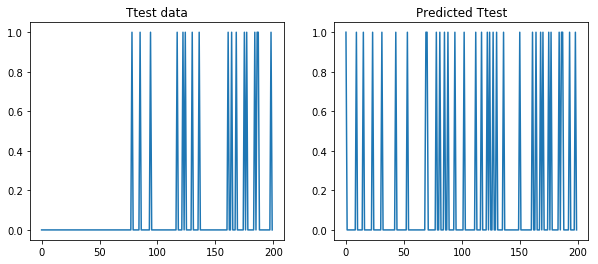

In [102]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_ec4[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(y4[:200])
plt.title("Predicted Ttest")

### Testing on Set 5

In [103]:
Ttrain_ec5=Xtrain_ec5['target_class']
Xtrain_ec5=Xtrain_ec5.drop(['target_class'],axis=1)

Ttest_ec5=df5['target_class']
Xtest_ec5=df5.drop(['target_class'],axis=1)

In [104]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

Xtrain_ec5=scaler.fit_transform(Xtrain_ec5)
Xtest_ec5=scaler.fit_transform(Xtest_ec5)
Ttrain_ec5=np.array(normalize(Ttrain_ec5))
Ttest_ec5=np.array(Ttest_ec5)

In [105]:
p=Pocket()
p.train(Xtrain_ec5,Ttrain_ec5)

End of training:  14
[ 0.04793734  0.04902619  0.19252583  0.11323544  0.00963466  0.03102008
  0.01891629 -0.06332399]


In [106]:
y5=p.use(Xtest_ec5)
y5[y5==-1]=0
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print("Accuracy : ",accuracy_score(Ttest_ec5,y5))
print("F1 score : ",f1_score(Ttest_ec5,y5))

Accuracy :  0.6345616973757677
F1 score :  0.07228915662650602


Text(0.5,1,'Predicted Ttest')

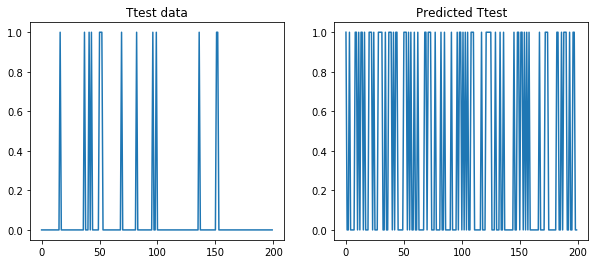

In [107]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_ec5[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(y5[:200])
plt.title("Predicted Ttest")

## Using QDA

### Testing on Set 1

In [108]:
dfq1=df.iloc[:3579,:]
dfq2=df.iloc[3579:7158,:]
dfq3=df.iloc[7158:10737,:]
dfq4=df.iloc[10737:14316,:]
dfq5=df.iloc[14316:,:]

Xtrain_q1=pd.concat([dfq2,dfq3,dfq4,dfq5])
Xtrain_q2=pd.concat([dfq1,dfq3,dfq4,dfq5])
Xtrain_q3=pd.concat([dfq1,dfq2,dfq4,dfq5])
Xtrain_q4=pd.concat([dfq1,dfq2,dfq3,dfq5])
Xtrain_q5=pd.concat([dfq1,dfq2,dfq3,dfq4])

In [109]:
Ttrain_q1=Xtrain_q1['target_class']
Xtrain_q1=Xtrain_q1.drop(['target_class'],axis=1)

Ttest_q1=dfq1['target_class']
Xtest_q1=dfq1.drop(['target_class'],axis=1)

In [110]:
q1=QDA()
q1.train(Xtrain_q1,np.array(Ttrain_q1).reshape(-1,1))

In [111]:
qy1,d1,d2=q1.use(Xtest_q1)

In [112]:
print('Accuracy : ', accuracy_score(Ttest_q1, qy1))
print('F1 score : ', f1_score(Ttest_q1, qy1))

Accuracy :  0.9480301760268232
F1 score :  0.7256637168141593


Text(0.5,1,'Predicted Ttest')

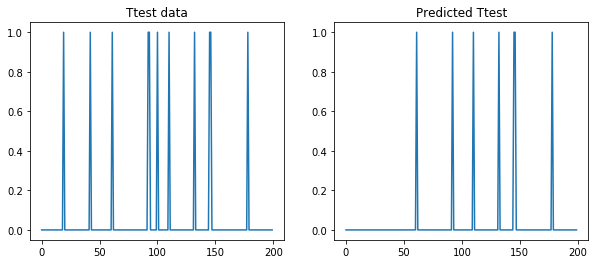

In [113]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_q1[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(qy1[:200])
plt.title("Predicted Ttest")

### Testing on Set 2

In [114]:
Ttrain_q2=Xtrain_q2['target_class']
Xtrain_q2=Xtrain_q2.drop(['target_class'],axis=1)

Ttest_q2=dfq2['target_class']
Xtest_q2=dfq2.drop(['target_class'],axis=1)



In [115]:
q2=QDA()
q2.train(Xtrain_q2,np.array(Ttrain_q2).reshape(-1,1))

qy2,d1,d2=q2.use(Xtest_q2)

print('Accuracy : ', accuracy_score(Ttest_q2, qy2))
print('F1 score : ', f1_score(Ttest_q2, qy2))

Accuracy :  0.9471919530595139
F1 score :  0.7809965237543453


Text(0.5,1,'Predicted Ttest')

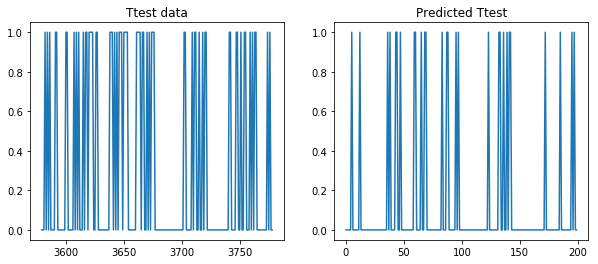

In [116]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_q2[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(qy2[:200])
plt.title("Predicted Ttest")

### Testing on Set 3

In [117]:
Ttrain_q3=Xtrain_q3['target_class']
Xtrain_q3=Xtrain_q3.drop(['target_class'],axis=1)

Ttest_q3=dfq3['target_class']
Xtest_q3=dfq3.drop(['target_class'],axis=1)



In [118]:
q3=QDA()
q3.train(Xtrain_q3,np.array(Ttrain_q3).reshape(-1,1))

qy3,d1,d2=q3.use(Xtest_q3)

print('Accuracy : ', accuracy_score(Ttest_q3, qy3))
print('F1 score : ', f1_score(Ttest_q3, qy3))

Accuracy :  0.9670298966191674
F1 score :  0.8013468013468013


Text(0.5,1,'Predicted Ttest')

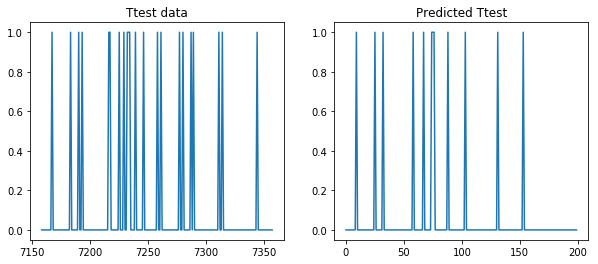

In [119]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_q3[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(qy3[:200])
plt.title("Predicted Ttest")

### Testing on Set 4

In [120]:
Ttrain_q4=Xtrain_q4['target_class']
Xtrain_q4=Xtrain_q4.drop(['target_class'],axis=1)

Ttest_q4=dfq4['target_class']
Xtest_q4=dfq4.drop(['target_class'],axis=1)



In [121]:
q4=QDA()
q4.train(Xtrain_q4,np.array(Ttrain_q4).reshape(-1,1))

qy4,d1,d2=q4.use(Xtest_q4)

print('Accuracy : ', accuracy_score(Ttest_q4, qy4))
print('F1 score : ', f1_score(Ttest_q4, qy4))

Accuracy :  0.9692651578653255
F1 score :  0.7708333333333333


Text(0.5,1,'Predicted Ttest')

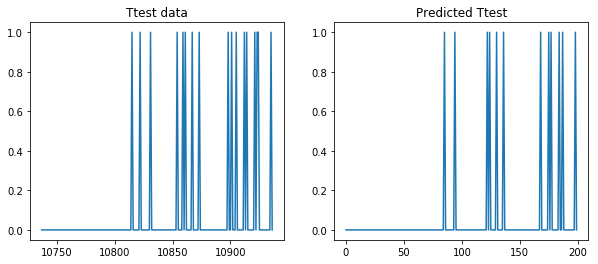

In [122]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_q4[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(qy4[:200])
plt.title("Predicted Ttest")

### Testing on Set 5

In [123]:
Ttrain_q5=Xtrain_q5['target_class']
Xtrain_q5=Xtrain_q5.drop(['target_class'],axis=1)

Ttest_q5=dfq5['target_class']
Xtest_q5=dfq5.drop(['target_class'],axis=1)



In [124]:
q5=QDA()
q5.train(Xtrain_q5,np.array(Ttrain_q5).reshape(-1,1))

qy5,d1,d2=q5.use(Xtest_q5)

print('Accuracy : ', accuracy_score(Ttest_q5, qy5))
print('F1 score : ', f1_score(Ttest_q5, qy5))

Accuracy :  0.9910664433277498
F1 score :  0.6190476190476191


Text(0.5,1,'Predicted Ttest')

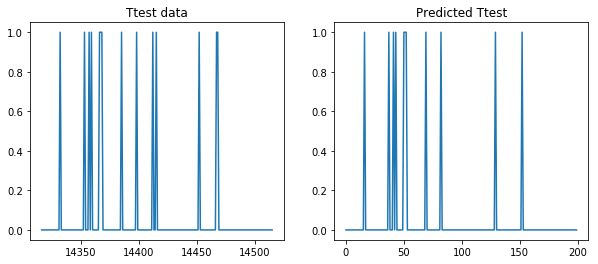

In [125]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_q5[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(qy5[:200])
plt.title("Predicted Ttest")

## Using LDA

### Testing on Set 1

In [126]:
dfl1=df.iloc[:3579,:]
dfl2=df.iloc[3579:7158,:]
dfl3=df.iloc[7158:10737,:]
dfl4=df.iloc[10737:14316,:]
dfl5=df.iloc[14316:,:]

Xtrain_l1=pd.concat([dfl2,dfl3,dfl4,dfl5])
Xtrain_l2=pd.concat([dfl1,dfl3,dfl4,dfl5])
Xtrain_l3=pd.concat([dfl1,dfl2,dfl4,dfl5])
Xtrain_l4=pd.concat([dfl1,dfl2,dfl3,dfl5])
Xtrain_l5=pd.concat([dfl1,dfl2,dfl3,dfl4])

In [127]:
Ttrain_l1=Xtrain_l1['target_class']
Xtrain_l1=Xtrain_l1.drop(['target_class'],axis=1)

Ttest_l1=dfl1['target_class']
Xtest_l1=dfl1.drop(['target_class'],axis=1)



In [128]:
l1=LDA()
l1.train(Xtrain_l1,np.array(Ttrain_l1).reshape(-1,1))

ly1,d1,d2=l1.use(Xtest_l1)

print('Accuracy : ', accuracy_score(Ttest_l1, ly1))
print('F1 score : ', f1_score(Ttest_l1, ly1))

Accuracy :  0.9463537300922046
F1 score :  0.7108433734939759


Text(0.5,1,'Predicted Ttest')

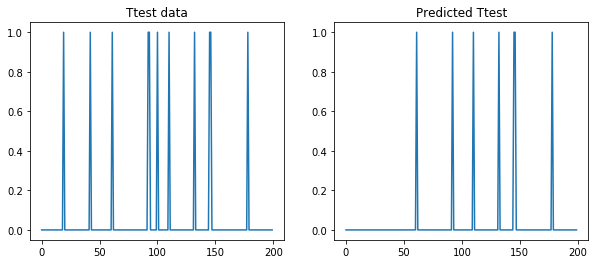

In [129]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_l1[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(ly1[:200])
plt.title("Predicted Ttest")

### Testing on Set 2

In [130]:
Ttrain_l2=Xtrain_l2['target_class']
Xtrain_l2=Xtrain_l2.drop(['target_class'],axis=1)

Ttest_l2=dfl2['target_class']
Xtest_l2=dfl2.drop(['target_class'],axis=1)



In [131]:
l2=LDA()
l2.train(Xtrain_l2,np.array(Ttrain_l2).reshape(-1,1))

ly2,d1,d2=l2.use(Xtest_l2)

print('Accuracy : ', accuracy_score(Ttest_l2, ly2))
print('F1 score : ', f1_score(Ttest_l2, ly2))

Accuracy :  0.9259569712210115
F1 score :  0.6553966189856958


Text(0.5,1,'Predicted Ttest')

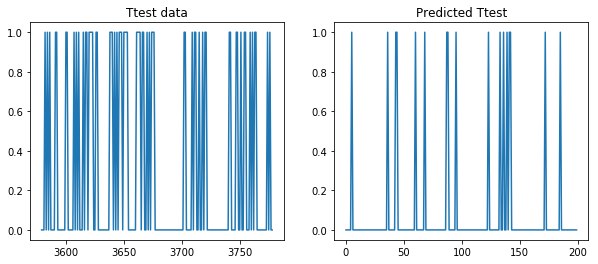

In [132]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_l2[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(ly2[:200])
plt.title("Predicted Ttest")

### Testing on Set 3

In [133]:
Ttrain_l3=Xtrain_l3['target_class']
Xtrain_l3=Xtrain_l3.drop(['target_class'],axis=1)

Ttest_l3=dfl3['target_class']
Xtest_l3=dfl3.drop(['target_class'],axis=1)



In [134]:
l3=LDA()
l3.train(Xtrain_l3,np.array(Ttrain_l3).reshape(-1,1))

ly3,d1,d2=l3.use(Xtest_l3)

print('Accuracy : ', accuracy_score(Ttest_l3, ly3))
print('F1 score : ', f1_score(Ttest_l3, ly3))

Accuracy :  0.9659122659960883
F1 score :  0.7932203389830509


Text(0.5,1,'Predicted Ttest')

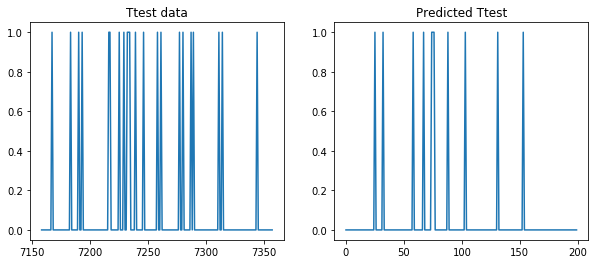

In [135]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_l3[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(ly3[:200])
plt.title("Predicted Ttest")

### Testing on Set 4

In [136]:
Ttrain_l4=Xtrain_l4['target_class']
Xtrain_l4=Xtrain_l4.drop(['target_class'],axis=1)

Ttest_l4=dfl4['target_class']
Xtest_l4=dfl4.drop(['target_class'],axis=1)



In [137]:
l4=LDA()
l4.train(Xtrain_l4,np.array(Ttrain_l4).reshape(-1,1))

ly4,d1,d2=l4.use(Xtest_l4)

print('Accuracy : ', accuracy_score(Ttest_l4, ly4))
print('F1 score : ', f1_score(Ttest_l4, ly4))

Accuracy :  0.9712210114557139
F1 score :  0.7927565392354126


Text(0.5,1,'Predicted Ttest')

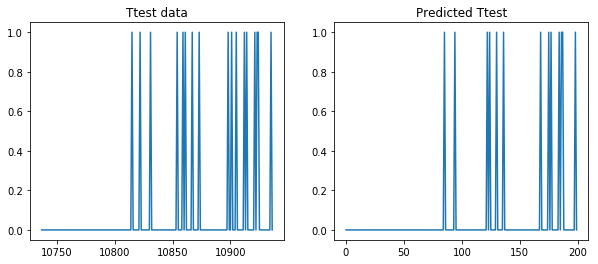

In [138]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_l4[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(ly4[:200])
plt.title("Predicted Ttest")

### Testing on Set 5

In [139]:
Ttrain_l5=Xtrain_l5['target_class']
Xtrain_l5=Xtrain_l5.drop(['target_class'],axis=1)

Ttest_l5=dfl5['target_class']
Xtest_l5=dfl5.drop(['target_class'],axis=1)



In [140]:
l5=LDA()
l5.train(Xtrain_l5,np.array(Ttrain_l5).reshape(-1,1))

ly5,d1,d2=l5.use(Xtest_l5)

print('Accuracy : ', accuracy_score(Ttest_l5, ly5))
print('F1 score : ', f1_score(Ttest_l5, ly5))

Accuracy :  0.986320491345617
F1 score :  0.6573426573426574


Text(0.5,1,'Predicted Ttest')

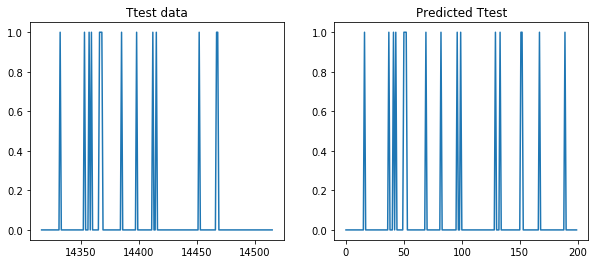

In [141]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_l5[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(ly5[:200])
plt.title("Predicted Ttest")

## Using Logistic Regression

### Testing on Set 1

In [142]:
dflr1=df.iloc[:3579,:]
dflr2=df.iloc[3579:7158,:]
dflr3=df.iloc[7158:10737,:]
dflr4=df.iloc[10737:14316,:]
dflr5=df.iloc[14316:,:]

Xtrain_lr1=pd.concat([dflr2,dflr3,dflr4,dflr5])
Xtrain_lr2=pd.concat([dflr1,dflr3,dflr4,dflr5])
Xtrain_lr3=pd.concat([dflr1,dflr2,dflr4,dflr5])
Xtrain_lr4=pd.concat([dflr1,dflr2,dflr3,dflr5])
Xtrain_lr5=pd.concat([dflr1,dflr2,dflr3,dflr4])

In [143]:
Ttrain_lr1=Xtrain_lr1['target_class']
Xtrain_lr1=Xtrain_lr1.drop(['target_class'],axis=1)

Ttest_lr1=dflr1['target_class']
Xtest_lr1=dflr1.drop(['target_class'],axis=1)



In [144]:
lr1=Log_Reg(0.00001)
lr1.train(Xtrain_lr1,np.array(Ttrain_lr1).reshape(-1,1))

lry1=lr1.use(Xtest_lr1)
lry1=np.argmax(lry1,1)
print('Accuracy : ', accuracy_score(Ttest_lr1, lry1))
print('F1 score : ', f1_score(Ttest_lr1, lry1))

Accuracy :  0.9044425817267393
F1 score :  0.3346303501945525


Text(0.5,1,'Predicted Ttest')

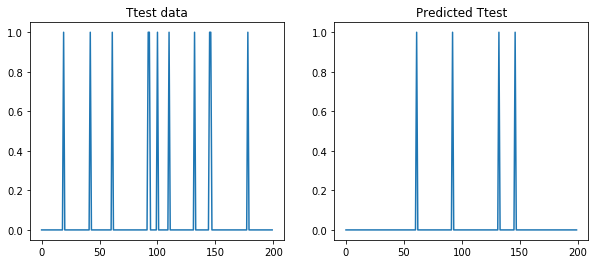

In [145]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_lr1[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(lry1[:200])
plt.title("Predicted Ttest")

### Testing on Set 2

In [146]:
Ttrain_lr2=Xtrain_lr2['target_class']
Xtrain_lr2=Xtrain_lr2.drop(['target_class'],axis=1)

Ttest_lr2=dflr2['target_class']
Xtest_lr2=dflr2.drop(['target_class'],axis=1)



In [147]:
lr2=Log_Reg(0.00001)
lr2.train(Xtrain_lr2,np.array(Ttrain_lr2).reshape(-1,1))

lry2=lr2.use(Xtest_lr2)
lry2=np.argmax(lry2,1)
print('Accuracy : ', accuracy_score(Ttest_lr2, lry2))
print('F1 score : ', f1_score(Ttest_lr2, lry2))

Accuracy :  0.86756077116513
F1 score :  0.1474820143884892


Text(0.5,1,'Predicted Ttest')

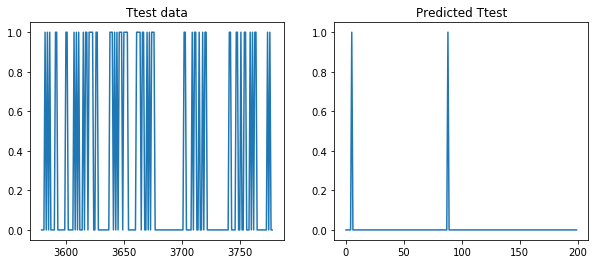

In [148]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_lr2[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(lry2[:200])
plt.title("Predicted Ttest")

### Testing on Set 3

In [149]:
Ttrain_lr3=Xtrain_lr3['target_class']
Xtrain_lr3=Xtrain_lr3.drop(['target_class'],axis=1)

Ttest_lr3=dflr3['target_class']
Xtest_lr3=dflr3.drop(['target_class'],axis=1)



In [150]:
lr3=Log_Reg(0.00001)
lr3.train(Xtrain_lr3,np.array(Ttrain_lr3).reshape(-1,1))

lry3=lr3.use(Xtest_lr3)
lry3=np.argmax(lry3,1)
print('Accuracy : ', accuracy_score(Ttest_lr3, lry3))
print('F1 score : ', f1_score(Ttest_lr3, lry3))

Accuracy :  0.9256775635652417
F1 score :  0.3926940639269406


Text(0.5,1,'Predicted Ttest')

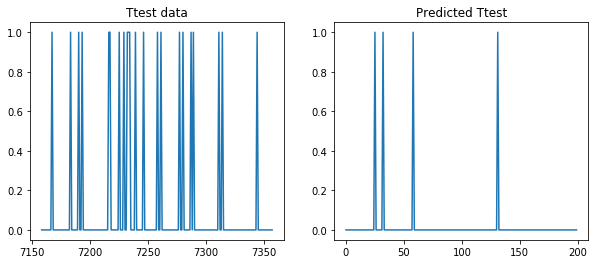

In [151]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_lr3[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(lry3[:200])
plt.title("Predicted Ttest")

### Testing on Set 4

In [152]:
Ttrain_lr4=Xtrain_lr4['target_class']
Xtrain_lr4=Xtrain_lr4.drop(['target_class'],axis=1)

Ttest_lr4=dflr4['target_class']
Xtest_lr4=dflr4.drop(['target_class'],axis=1)



In [153]:
lr4=Log_Reg(0.00001)
lr4.train(Xtrain_lr4,np.array(Ttrain_lr4).reshape(-1,1))

lry4=lr4.use(Xtest_lr4)
lry4=np.argmax(lry4,1)
print('Accuracy : ', accuracy_score(Ttest_lr4, lry4))
print('F1 score : ', f1_score(Ttest_lr4, lry4))

Accuracy :  0.9441184688460463
F1 score :  0.47643979057591623


Text(0.5,1,'Predicted Ttest')

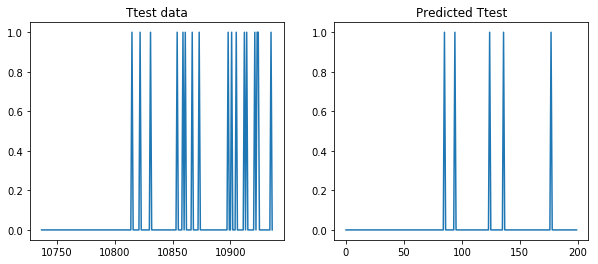

In [154]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_lr4[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(lry4[:200])
plt.title("Predicted Ttest")

### Testing on Set 5

In [155]:
Ttrain_lr5=Xtrain_lr5['target_class']
Xtrain_lr5=Xtrain_lr5.drop(['target_class'],axis=1)

Ttest_lr5=dflr5['target_class']
Xtest_lr5=dflr5.drop(['target_class'],axis=1)



In [156]:
lr5=Log_Reg(0.00001)
lr5.train(Xtrain_lr5,np.array(Ttrain_lr5).reshape(-1,1))

lry5=lr5.use(Xtest_lr5)
lry5=np.argmax(lry5,1)
print('Accuracy : ', accuracy_score(Ttest_lr5, lry5))
print('F1 score : ', f1_score(Ttest_lr5, lry5))

Accuracy :  0.9916247906197655
F1 score :  0.6739130434782609


Text(0.5,1,'Predicted Ttest')

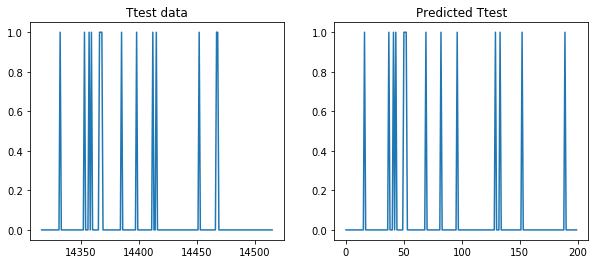

In [157]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Ttest_lr5[:200])
plt.title("Ttest data")

plt.subplot(122)
plt.plot(lry5[:200])
plt.title("Predicted Ttest")

## Observing the 5 different training/testing errors

In pocket algorithm,

> Testing on set 1 and Training on other 4 sets has accuracy of 94% with F1 score of 79%

> Testing on set 2 and Training on other 4 sets has accuracy of 96% with F1 score of 88%

> Testing on set 3 and Training on other 4 sets has accuracy of 93% with F1 score of 70%

> Testing on set 4 and Training on other 4 sets has accuracy of 83% with F1 score of 47%

> Testing on set 5 and Training on other 4 sets has accuracy of 64% with F1 score of 7%

here pocket algorithm's accuracy is decreasing while considering different sets for training like when set 4 is considered for testing and set 1,2,3,5 are considered for training it has an accuracy of 83%. Similarly, when set 5 is considered for testing and set 1,2,3,4 are considered for training it has an accuracy of 64%. Set 5 is contributing majorly in predicting the correct values. Removing this set from training results in low accuracy.


In QDA algorithm,

> Testing on set 1 and Training on other 4 sets has accuracy of 94% with F1 score of 72%

> Testing on set 2 and Training on other 4 sets has accuracy of 94% with F1 score of 78%

> Testing on set 3 and Training on other 4 sets has accuracy of 96% with F1 score of 80%

> Testing on set 4 and Training on other 4 sets has accuracy of 96% with F1 score of 77%

> Testing on set 5 and Training on other 4 sets has accuracy of 99% with F1 score of 61%

here QDA algorithm's accuracy is almost same while considering different sets for training like when set 4 is considered for testing and set 1,2,3,5 are considered for training it has an accuracy of 96%. Similarly, when set 5 is considered for testing and set 1,2,3,4 are considered for training it has an accuracy of 99%, the accuracy increases a bit. While experimenting on pocket, Set 5 was contributing majorly in predicting the correct values. Removing this set from training resulted in low accuracy but in QDA, the accuracy increases when set 5 was removed but it affected f1 score which decreases to 61%.

In LDA algorithm,

> Testing on set 1 and Training on other 4 sets has accuracy of 94% with F1 score of 71%

> Testing on set 2 and Training on other 4 sets has accuracy of 92% with F1 score of 65%

> Testing on set 3 and Training on other 4 sets has accuracy of 96% with F1 score of 79%

> Testing on set 4 and Training on other 4 sets has accuracy of 97% with F1 score of 79%

> Testing on set 5 and Training on other 4 sets has accuracy of 98% with F1 score of 65%

here LDA algorithm's accuracy is increasing a bit while considering different sets for training like when set 2 is considered for testing and set 1,3,4,5 are considered for training it has an accuracy of 92%. Similarly, when set 5 is considered for testing and set 1,2,3,4 are considered for training it has an accuracy of 98%, the accuracy increases a bit. While experimenting on pocket, Set 5 was contributing majorly in predicting the correct values. Removing this set from training resulted in low accuracy but in QDA and LDA, the accuracy increases when set 5 was removed from training but it affected f1 score which decreases to 65%.

In Logistic Regression algorithm,

> Testing on set 1 and Training on other 4 sets has accuracy of 90% with F1 score of 33%

> Testing on set 2 and Training on other 4 sets has accuracy of 86% with F1 score of 14%

> Testing on set 3 and Training on other 4 sets has accuracy of 92% with F1 score of 39%

> Testing on set 4 and Training on other 4 sets has accuracy of 94% with F1 score of 47%

> Testing on set 5 and Training on other 4 sets has accuracy of 99% with F1 score of 67%

here Logistic Regression algorithm's accuracy is increasing and decreasing a bit while considering different sets for training like when set 1 has 90% accuracy and it decreases when set 2 is considered for testing and set 1,3,4,5 are considered for training it has an accuracy of 86%. Similarly, when set 5 is considered for testing and set 1,2,3,4 are considered for training it has an accuracy of 99%, the accuracy increases a bit. While experimenting on pocket, Set 5 was contributing majorly in predicting the correct values. Removing this set from training resulted in low accuracy but in QDA, LDA and Logistic Regression, the accuracy increases when set 5 was removed from training but it affected f1 score in QDA and LDA but here in logistic regression the f1 score is increasing from 14% to 67%.
